
# Objective



* LoanTap ---> Financial Solutions (Millenials)
* Data Science -----> Credit Underwriting Process {Personal Loan Section} ----> 1. Borrower Behaviour  2. Credit Worthiness
* Dataset ----> 1. Financial Behaviour  2. Spending Habits  3. Borrower Risk  --optimize--> 1. Loan Disbursal   2. Customer Outreach

# Data Issues

# Importing Libraries

In [ ]:
# main libraries
import pandas as pd
import numpy as np


# pre-processing libs
from sklearn.impute import SimpleImputer

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# settings
pd.set_option('display.max_columns', None)

# DataFrame Overview

## Importing DataFrame

In [ ]:
!gdown 1QYf_gjlkpQEDo6RvVl0HKlh_yZy0JPEk

Downloading...
From: https://drive.google.com/uc?id=1QYf_gjlkpQEDo6RvVl0HKlh_yZy0JPEk
To: /content/data.csv
100% 100M/100M [00:02<00:00, 44.6MB/s] 


In [ ]:
df = pd.read_csv('data.csv')
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [ ]:
df.shape

(396030, 27)

* There are 396030 Rows and 27 Columns

## Features Overview

### Categorical Features

In [ ]:
  df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 396030 non-null  object
 1   grade                396030 non-null  object
 2   sub_grade            396030 non-null  object
 3   emp_title            373103 non-null  object
 4   emp_length           377729 non-null  object
 5   home_ownership       396030 non-null  object
 6   verification_status  396030 non-null  object
 7   issue_d              396030 non-null  object
 8   loan_status          396030 non-null  object
 9   purpose              396030 non-null  object
 10  title                394274 non-null  object
 11  earliest_cr_line     396030 non-null  object
 12  initial_list_status  396030 non-null  object
 13  application_type     396030 non-null  object
 14  address              396030 non-null  object
dtypes: object(15)
memory usage: 45.3+ 

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols = [ c for c in cat_cols if 'issue_d' not in c and 'earliest_cr_line'  not in c ]        # these are date cols

for col in cat_cols:
  print('\n', f'{col}: {df[col].unique()}')

print('\n', f"Total Categorical Features: {len(cat_cols)}")


 term: [' 36 months' ' 60 months']

 grade: ['B' 'A' 'C' 'E' 'D' 'F' 'G']

 sub_grade: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']

 emp_title: ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']

 emp_length: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]

 home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']

 verification_status: ['Not Verified' 'Source Verified' 'Verified']

 loan_status: ['Fully Paid' 'Charged Off']

 purpose: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']

 title: ['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' '

In [ ]:
print(df['title'].nunique(), df['emp_title'].nunique())

48816 173105


* All above features will have to be obtained in form numerical data type except **address** and **title** (has 48816 unique values).   
* Grades and sub_grades might require a concat.
* **title** has 48816 unique values, this will require further investigation, for feasibility of usage in model.
* **emp_title** has 173105 unique values, this will require further investigation, for feasibility of usage in model.
* **Address** has information of Pincode, State, City, Locality that will require extraction.

### Numerical Features

In [ ]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   dti                   396030 non-null  float64
 5   open_acc              396030 non-null  float64
 6   pub_rec               396030 non-null  float64
 7   revol_bal             396030 non-null  float64
 8   revol_util            395754 non-null  float64
 9   total_acc             396030 non-null  float64
 10  mort_acc              358235 non-null  float64
 11  pub_rec_bankruptcies  395495 non-null  float64
dtypes: float64(12)
memory usage: 36.3 MB


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


* Loan Amount is in range of 500-40000, seems to be right skewed (median-12000)
* Interest Rate is in range 5.32% - 30.99%, seems right skewed (median-13.33)
* Installments (Monthly Amount) seems to be on lower side, 16.08 to 1533.81. Median installment amount is 375.
* There are Customers with Annual Income as 0, max income is 8E+6, also annual income is right skewed.
* dti (debt to income) is in range 0 to 9999, right skewed.
large, that mean most customers already have multiple credits.
* revol_balance (total credit balance) median is 1.18e+4, Most customers have more than 1.18 lakhs of credit balance left. This is right skewed.
* revol_util (utilization) is 54.8 for most customers.
* Open Accounts (Number of Active credit lines) has median of 8. This seems very
* total_acc (Number of Active credit lines) has median of 24. Comparing with open_accounts depicts that customers have 16/24 * 100 = 66.7% credit lines as inactive.
* mort_acc: Number of Borrowers Mortgages. Median number of mortgages are 1
* pub_rec (Negative Public Credit Profile) median is 0, amx at 86.
* pub_rec_bankruptcies: Median bankruptcy record is 0, max is 8. So, few customers have bankruptcies

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


* DataFrame has 27 features, 13 are categorical features, 13 are numerical and 2 are Date features (that may require better formatting).
* issue_d, earliest_cr_line have Month, Year

* Assumptions of Logistic Regression
* Binary Outcome: The dependent variable should be binary.
* Independent Observations: Observations should be independent of each other.
* Linearity of Logits: The log odds (the link function of logistic regression) should have a linear relationship with each predictor.
* No Perfect Multicollinearity: As you mentioned, VIFs are used for this.

# Data Quality

## Missing Values

In [ ]:
print(f"Total of { np.round(((df.isna().sum().sum() / df.shape[0]) * 100), 2) } % rows have NaNs")

Total of 20.6 % rows have NaNs


In [ ]:
all_nans = pd.DataFrame({ '% NaNs': np.round((df.isna().sum()/df.shape[0]) * 100, 2),
                            'Total NaNs' : df.isna().sum(),
                          'Data Type': df.dtypes }
                        )
all_nans = all_nans[all_nans['% NaNs'] > 0]
all_nans = all_nans.sort_values(by='Total NaNs', ascending=False)
all_nans

,% NaNs,Total NaNs,Data Type
mort_acc,9.54,37795,float64
emp_title,5.79,22927,object
emp_length,4.62,18301,object
title,0.44,1756,object
pub_rec_bankruptcies,0.14,535,float64
revol_util,0.07,276,float64


* 6 Columns have NaNs - ['mort_acc', 'emp_title', 'emp_length', 'title' 'pub_rec_bankruptcies', 'revol_util']
* All 6 columns except **mort_acc** (Total NaNs = 9.5%) have about 5% or less NaNs
* Total of **20.6%** rows have NaNs, dropping this portion of rows will be a significant information loss. We will fill NaNs for all columns.

In [ ]:
all_nans[all_nans['Data Type'] == 'object']

,% NaNs,Total NaNs,Data Type
emp_title,5.79,22927,object
emp_length,4.62,18301,object
title,0.44,1756,object


In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

for i, r in all_nans[all_nans['Data Type'] == 'object'].iterrows():
    df[i] = pd.DataFrame(cat_imputer.fit_transform(pd.DataFrame(df[i])))

for i, r in all_nans[all_nans['Data Type'] == 'float64'].iterrows():
    df[i] = pd.DataFrame(num_imputer.fit_transform(pd.DataFrame(df[i])))

df.isna().sum().sum()

0

In [ ]:
print(df['emp_title'].nunique())
print( f"{((df['emp_title'].nunique() / df.shape[0]) * 100)}%")

173105
43.710072469257376%


* emp_title has 173105 categories, these are extremely large categories.
* Number of employee title categories are 43.7% of total rows. Almost for 3rd row there is new category.
* Therefore, this column may not be useful

### FIlling NaNs

<Axes: ylabel='mort_acc'>

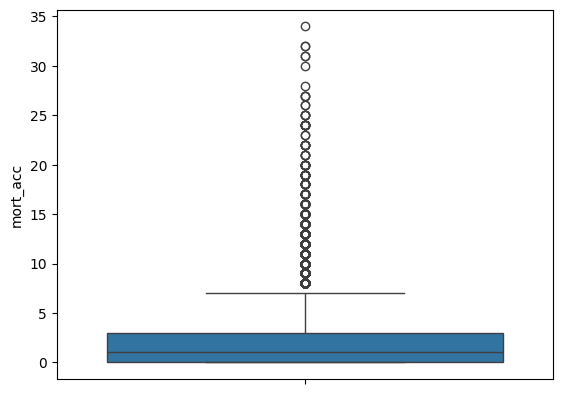

In [ ]:
import seaborn as sns
sns.boxplot(df['mort_acc'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df):

  vif = pd.DataFrame()

  vif['features'] = df.columns
  vif['vif'] = [ variance_inflation_factor(df.values, i) for i in range( df.shape[1])]
  vif = vif.sort_values(by='vif', ascending=False)

  return vif

## Duplicate Values

In [ ]:
df[df.duplicated() == True]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


* There are no duplicate rows

# Univariate Analysis - Numerical Features

## Functions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(df, col):

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  sns.histplot(df[col], kde=True)    # , bins=100

  plt.subplot(1, 2, 2)
  sns.boxplot(df[col])    # , bins=100

  plt.show()


def eval_dist(df, col):
    # Calculate Q1, Q3, IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Print summary statistics
    print(f"Total Rows: {df.shape[0]}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}\n")

    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    # print(f"Mode: {df[col].mode()}\n")

    # Outlier detection based on IQR
    outliers = df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))]

    # Print outlier statistics
    print(f"Total Outliers in {col}: {outliers.shape[0]}")
    print(f"Percent Outliers in {col}: {(outliers.shape[0] / df.shape[0]) * 100:.2f}%\n")

    # Skewness and Kurtosis
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurtosis()}\n")

    # Normality
    shapiro_test = shapiro(df[col])
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test[0]}")
    print(f"p-value: {shapiro_test[1]}\n")



## Numerical Features

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
from scipy.stats import shapiro
# shapiro(df[num_cols[1]])

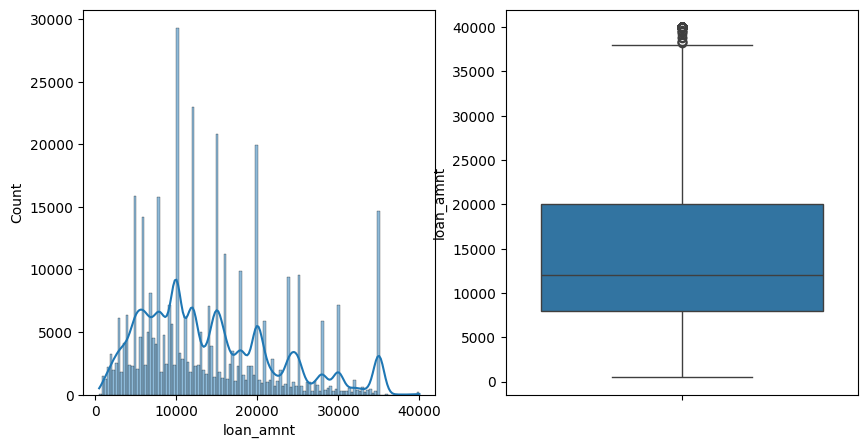

Total Rows: 396030
Q1: 8000.0
Q3: 20000.0
IQR: 12000.0

Min: 500.0
Max: 40000.0
Mean: 14113.888089286165
Median: 12000.0
Total Outliers in loan_amnt: 191
Percent Outliers in loan_amnt: 0.05%

Skewness: 0.777285467097746
Kurtosis: -0.0625975349858221

Shapiro-Wilk Test Statistic: 0.938523436214568
p-value: 2.6866136923061863e-125





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


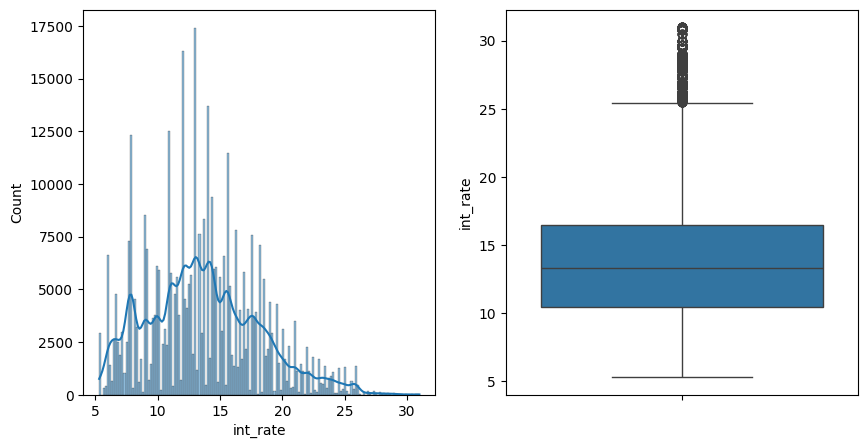

Total Rows: 396030
Q1: 10.49
Q3: 16.49
IQR: 5.999999999999998

Min: 5.32
Max: 30.99
Mean: 13.6394000454511
Median: 13.33
Total Outliers in int_rate: 3777
Percent Outliers in int_rate: 0.95%

Skewness: 0.4206694719582165
Kurtosis: -0.14394653809142932

Shapiro-Wilk Test Statistic: 0.981772966365056
p-value: 3.36714149848964e-92





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


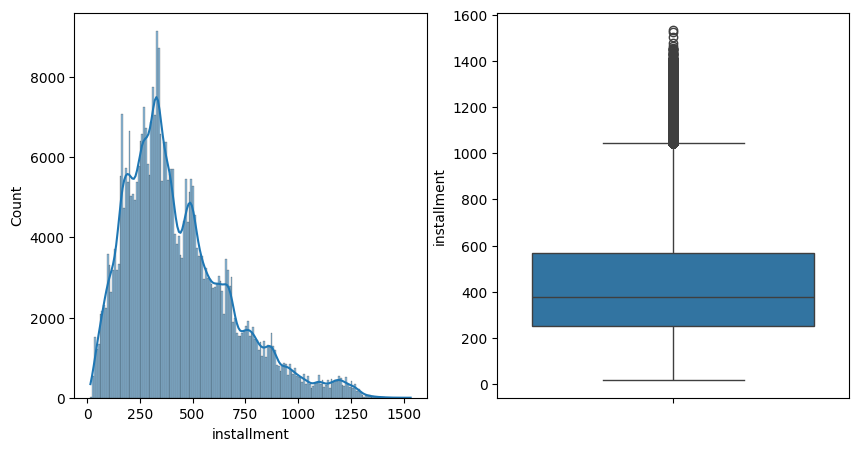

Total Rows: 396030
Q1: 250.33
Q3: 567.3
IQR: 316.9699999999999

Min: 16.08
Max: 1533.81
Mean: 431.84969802792716
Median: 375.43
Total Outliers in installment: 11250
Percent Outliers in installment: 2.84%

Skewness: 0.983598160890438
Kurtosis: 0.7838199212728041

Shapiro-Wilk Test Statistic: 0.935793447073033
p-value: 1.4155799268013085e-126





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


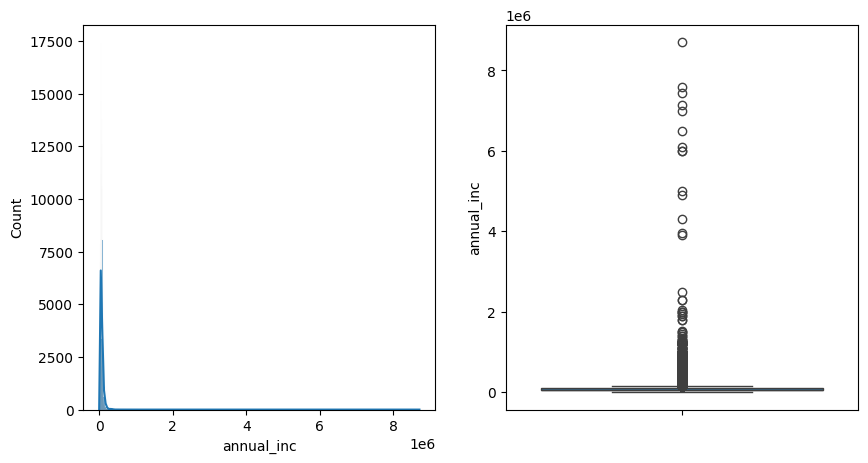

Total Rows: 396030
Q1: 45000.0
Q3: 90000.0
IQR: 45000.0

Min: 0.0
Max: 8706582.0
Mean: 74203.17579771738
Median: 64000.0
Total Outliers in annual_inc: 16700
Percent Outliers in annual_inc: 4.22%

Skewness: 41.042724746560665
Kurtosis: 4238.550571644392

Shapiro-Wilk Test Statistic: 0.46119931117012314
p-value: 3.2609232297643485e-197





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


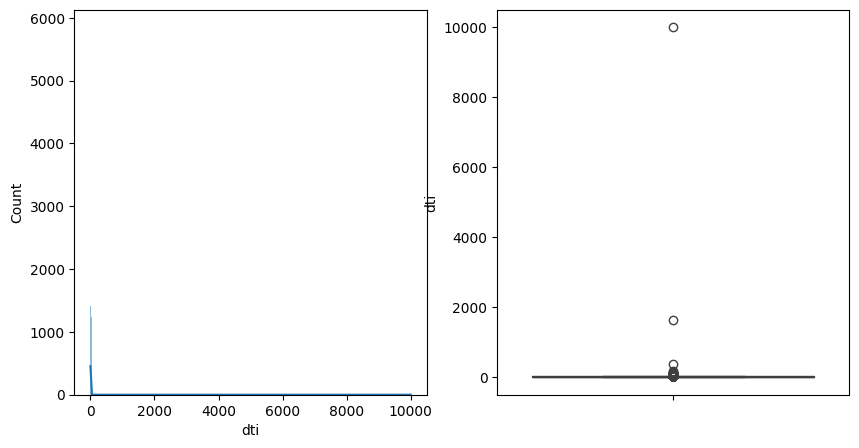

Total Rows: 396030
Q1: 11.28
Q3: 22.98
IQR: 11.700000000000001

Min: 0.0
Max: 9999.0
Mean: 17.379513647955967
Median: 16.91
Total Outliers in dti: 275
Percent Outliers in dti: 0.07%

Skewness: 431.05122535490415
Kurtosis: 237923.67649706747

Shapiro-Wilk Test Statistic: 0.2090257182947357
p-value: 1.2099161863811298e-211





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


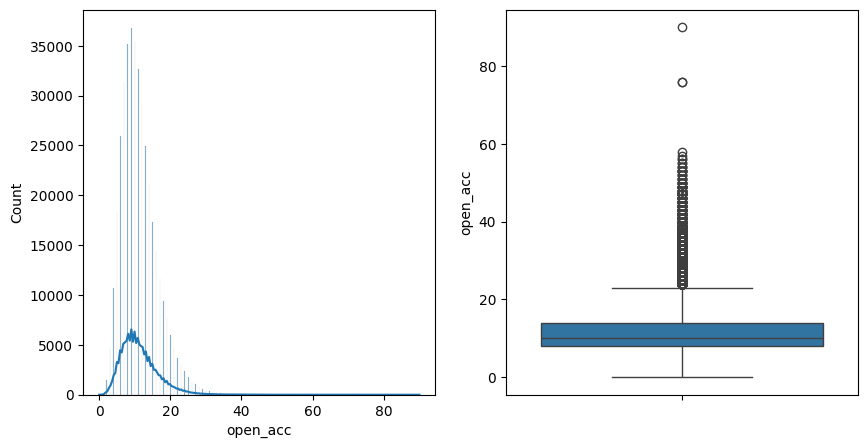

Total Rows: 396030
Q1: 8.0
Q3: 14.0
IQR: 6.0

Min: 0.0
Max: 90.0
Mean: 11.31115319546499
Median: 10.0
Total Outliers in open_acc: 10307
Percent Outliers in open_acc: 2.60%

Skewness: 1.2130188444585455
Kurtosis: 2.966944774163257

Shapiro-Wilk Test Statistic: 0.9306357015064476
p-value: 7.269144217794575e-129





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


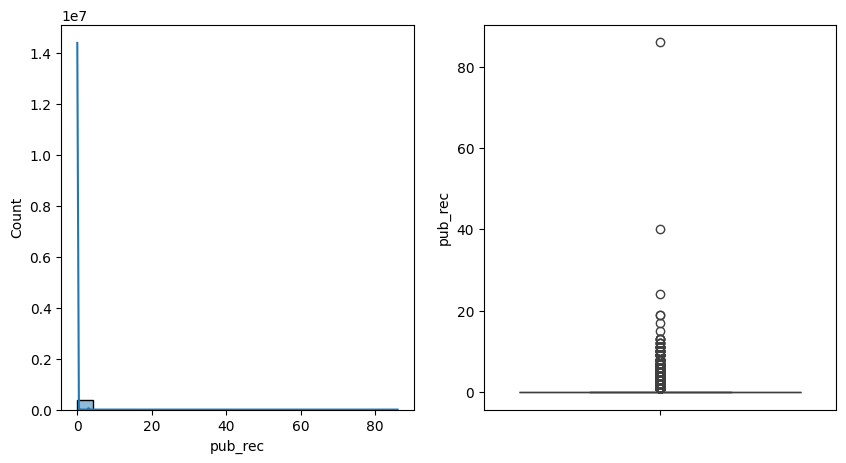

Total Rows: 396030
Q1: 0.0
Q3: 0.0
IQR: 0.0

Min: 0.0
Max: 86.0
Mean: 0.17819104613286874
Median: 0.0
Total Outliers in pub_rec: 57758
Percent Outliers in pub_rec: 14.58%

Skewness: 16.576564199464457
Kurtosis: 1867.4666428457756

Shapiro-Wilk Test Statistic: 0.35242703692550426
p-value: 4.6315102728388984e-204





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


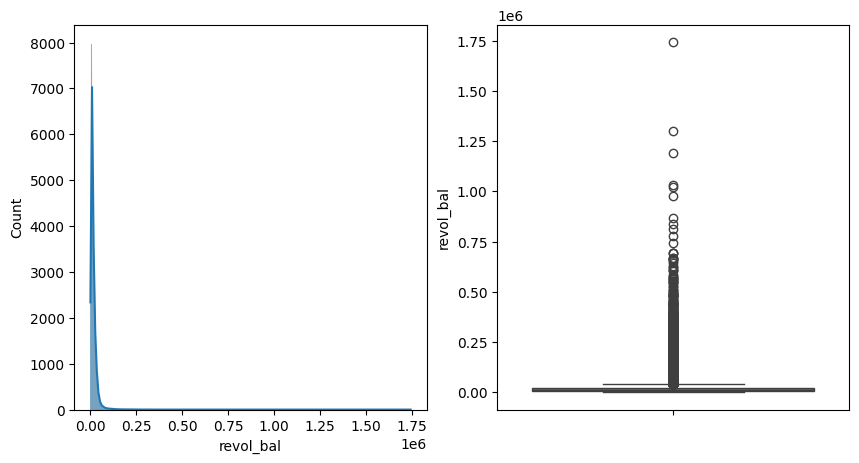

Total Rows: 396030
Q1: 6025.0
Q3: 19620.0
IQR: 13595.0

Min: 0.0
Max: 1743266.0
Mean: 15844.539853041437
Median: 11181.0
Total Outliers in revol_bal: 21259
Percent Outliers in revol_bal: 5.37%

Skewness: 11.727515124126919
Kurtosis: 384.221093093069

Shapiro-Wilk Test Statistic: 0.4984503945572495
p-value: 1.410185266209334e-194





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


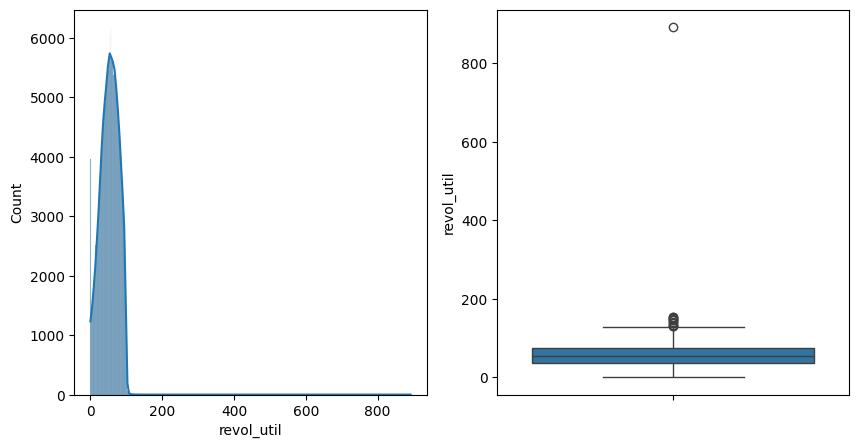

Total Rows: 396030
Q1: 35.9
Q3: 72.9
IQR: 37.00000000000001

Min: 0.0
Max: 892.3
Mean: 53.792451304194124
Median: 54.8
Total Outliers in revol_util: 12
Percent Outliers in revol_util: 0.00%

Skewness: -0.07188910791723081
Kurtosis: 2.716256667706004

Shapiro-Wilk Test Statistic: 0.9804289270815253
p-value: 5.398720094732832e-94





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


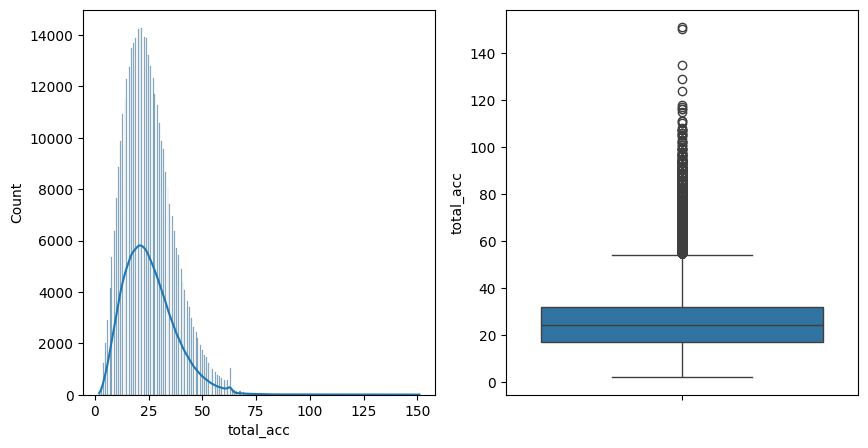

Total Rows: 396030
Q1: 17.0
Q3: 32.0
IQR: 15.0

Min: 2.0
Max: 151.0
Mean: 25.41474383253794
Median: 24.0
Total Outliers in total_acc: 8499
Percent Outliers in total_acc: 2.15%

Skewness: 0.8643276369429
Kurtosis: 1.204620013554436

Shapiro-Wilk Test Statistic: 0.9586950743253402
p-value: 6.650091532910589e-114





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


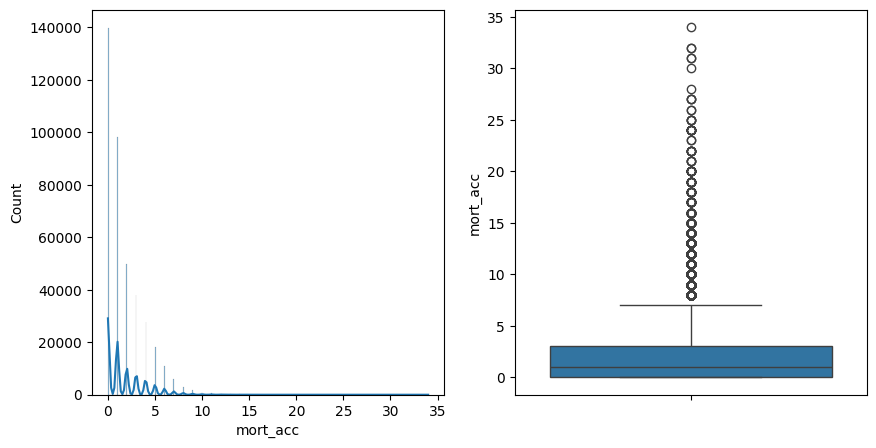

Total Rows: 396030
Q1: 0.0
Q3: 3.0
IQR: 3.0

Min: 0.0
Max: 34.0
Mean: 1.736307855465495
Median: 1.0
Total Outliers in mort_acc: 6843
Percent Outliers in mort_acc: 1.73%

Skewness: 1.7558645341907244
Kurtosis: 5.303073099944571

Shapiro-Wilk Test Statistic: 0.7991897124934253
p-value: 1.7811043260460056e-162





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


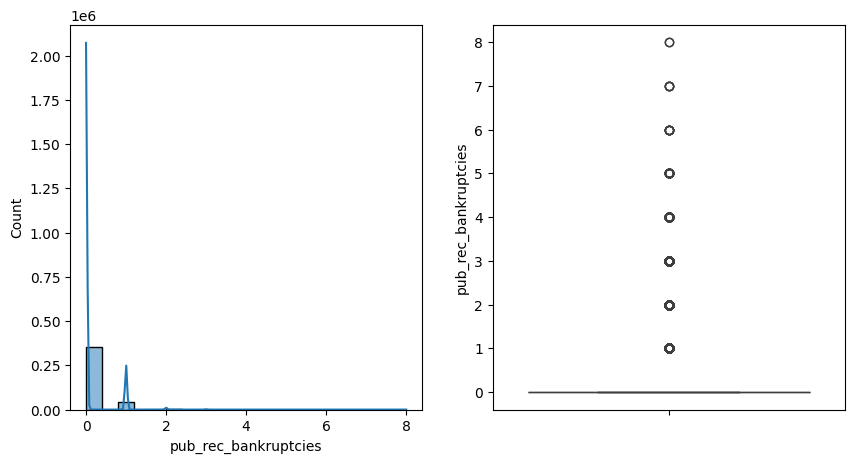

Total Rows: 396030
Q1: 0.0
Q3: 0.0
IQR: 0.0

Min: 0.0
Max: 8.0
Mean: 0.12148322096810847
Median: 0.0
Total Outliers in pub_rec_bankruptcies: 45115
Percent Outliers in pub_rec_bankruptcies: 11.39%

Skewness: 3.426276553377172
Kurtosis: 18.132394110329706

Shapiro-Wilk Test Statistic: 0.36593902754151153
p-value: 2.8637544127058366e-203





/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
for i in range(len(num_cols)):
  plot_dist(df, num_cols[i])
  eval_dist(df, num_cols[i])
  print('\n')

# Feature Binning Features

Features to bin (must)
* Pub_rec_bankruptcies
* Open_acc
* Mort_acc
* Pub_rec
* Open_acc
* Annunal_inc (it is continuous feature, not recommended)


## Pub_rec_bankruptcies

In [ ]:
for i in range (0,9):
  print(f"Number of Data Points for {i} Bankruptcies: {df[df['pub_rec_bankruptcies'] == i].shape[0]}")

Number of Data Points for 0 Bankruptcies: 350915
Number of Data Points for 1 Bankruptcies: 42790
Number of Data Points for 2 Bankruptcies: 1847
Number of Data Points for 3 Bankruptcies: 351
Number of Data Points for 4 Bankruptcies: 82
Number of Data Points for 5 Bankruptcies: 32
Number of Data Points for 6 Bankruptcies: 7
Number of Data Points for 7 Bankruptcies: 4
Number of Data Points for 8 Bankruptcies: 2


In [ ]:
df['pub_rec_bankruptcies'] = pd.cut(df['pub_rec_bankruptcies'], bins=[-1, 0, 1, float('inf')], labels=["0", "1", "More_than_1"])
print(df['pub_rec_bankruptcies'].unique())

['0', '1', 'More_than_1']
Categories (3, object): ['0' < '1' < 'More_than_1']


## open_acc

In [ ]:
def eval_bins(df, custom_bins, col):
    # Ensure the column is numeric (convert if necessary)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Extract the max bin value from custom_bins
    max_bin = custom_bins[-1]
    print(f"Max Bin: {max_bin}")

    # Iterate through the bins
    for i in range(len(custom_bins) - 1):  # Iterate only till the second last bin
        # Range for bin from custom_bins[i] to custom_bins[i+1]
        print(f"Number of Data Points for {custom_bins[i]} to {custom_bins[i+1]} range {col}: {df[(df[col] > custom_bins[i]) & (df[col] <= custom_bins[i+1])].shape[0]}")

    # For the last bin, we check values greater than or equal to the last bin
    print(f"Number of Data Points for >= {max_bin} range {col}: {df[(df[col] >= max_bin)].shape[0]}")

# Define custom bins and column name
custom_bins = [-1, 18, 30, 42, 54, 90]
# Assuming df is your dataframe and 'open_acc' is the column you're working with
eval_bins(df, custom_bins, 'open_acc')


Max Bin: 90
Number of Data Points for -1 to 18 range open_acc: 360741
Number of Data Points for 18 to 30 range open_acc: 33343
Number of Data Points for 30 to 42 range open_acc: 1820
Number of Data Points for 42 to 54 range open_acc: 117
Number of Data Points for 54 to 90 range open_acc: 9
Number of Data Points for >= 90 range open_acc: 1


In [ ]:
# Defined custom bin ranges based on data
bins = [-1, 18, 30, 42, 54, 90]  # Set bin edges: 0-18, 18-30, 30-42, 42-54, 54-90
labels = ['0-18', '18-30', '30-42', '42-54', '54-90']  # Bin labels

# Bin the feature
df['open_acc'] = pd.cut(df['open_acc'], bins=bins, labels=labels)
df['open_acc'].unique()

['0-18', '18-30', '30-42', '42-54', '54-90']
Categories (5, object): ['0-18' < '18-30' < '30-42' < '42-54' < '54-90']

## mort_acc

In [ ]:
custom_bins = [0, 3, 10, 20, 34, float('inf')]
eval_bins(df, custom_bins, 'mort_acc')


Max Bin: inf
Number of Data Points for 0 to 3 range mort_acc: 186208
Number of Data Points for 3 to 10 range mort_acc: 68844
Number of Data Points for 10 to 20 range mort_acc: 1162
Number of Data Points for 20 to 34 range mort_acc: 39
Number of Data Points for 34 to inf range mort_acc: 0
Number of Data Points for >= inf range mort_acc: 0


In [ ]:
bins = [-1, 3, 10, 20, 34]      # -1 to include 0

df['mort_acc'] = pd.cut(df['mort_acc'], bins=bins, right=True, labels=['0-3', '3-10', '10-20', '20-34'])
df['mort_acc'].unique()

['0-3', '3-10', '10-20', '20-34']
Categories (4, object): ['0-3' < '3-10' < '10-20' < '20-34']

## pub_rec

In [ ]:
custom_bins = [0, 1, 10, 30, 60, 86]
eval_bins(df, custom_bins, 'pub_rec')

Max Bin: 86
Number of Data Points for 0 to 1 range pub_rec: 49739
Number of Data Points for 1 to 10 range pub_rec: 7996
Number of Data Points for 10 to 30 range pub_rec: 21
Number of Data Points for 30 to 60 range pub_rec: 1
Number of Data Points for 60 to 86 range pub_rec: 1
Number of Data Points for >= 86 range pub_rec: 1


In [ ]:
bins = [0, 1, 5, 10, 30, float('inf')]  # Adjusted bin ranges

df['pub_rec'] = pd.cut(df['pub_rec'], bins=bins, right=False, labels=['[0, 1)', '[1, 5)', '[5, 10)', '[10, 30)', '[30, inf)'])
df['pub_rec'].unique()

['[0, 1)', '[1, 5)', '[5, 10)', '[10, 30)', '[30, inf)']
Categories (5, object): ['[0, 1)' < '[1, 5)' < '[5, 10)' < '[10, 30)' < '[30, inf)']

## revol_bal

In [ ]:
quantiles = df['revol_bal'].quantile([0.25, 0.5, 0.75, 1.0])
# print(quantiles)

custom_bins = [0, quantiles[0.25], quantiles[0.5], quantiles[0.75]  ]     # , df['revol_bal'].max()
custom_bins

eval_bins(df, custom_bins, 'revol_bal')

Max Bin: 19620.0
Number of Data Points for 0 to 6025.0 range revol_bal: 96883
Number of Data Points for 6025.0 to 11181.0 range revol_bal: 99011
Number of Data Points for 11181.0 to 19620.0 range revol_bal: 99009
Number of Data Points for >= 19620.0 range revol_bal: 99011


In [ ]:
bins = [0, quantiles[0.25], quantiles[0.5], quantiles[0.75], df['revol_bal'].max()+0.1 ]    # +0.1 to include right most value
labels = ['0-6025', '6025-11181', '11181-19620', '> 19620']

df['revol_bal'] = pd.cut(df['revol_bal'], bins=bins, labels=labels, right=False)
df['revol_bal'].unique()


['> 19620', '11181-19620', '0-6025', '6025-11181']
Categories (4, object): ['0-6025' < '6025-11181' < '11181-19620' < '> 19620']

# Removing Outliers

## dti

In [ ]:
df['dti'].unique()

array([26.24, 22.05, 12.79, ..., 40.56, 47.09, 55.53])

In [ ]:
df['dti'].dtype

dtype('float64')

In [ ]:
q1 = df['dti'].quantile(0.25)
q3 = df['dti'].quantile(0.75)
iqr = q3 - q1

print(type(q3 + (1.5 * iqr)))

df.loc[(df['dti'] < (q1 - (1.5 * iqr) )), 'dti' ] = q1 - (1.5 * iqr)
df.loc[(df['dti'] > (q3 + (1.5 * iqr) )), 'dti' ] = q3 + (1.5 * iqr)


<class 'numpy.float64'>


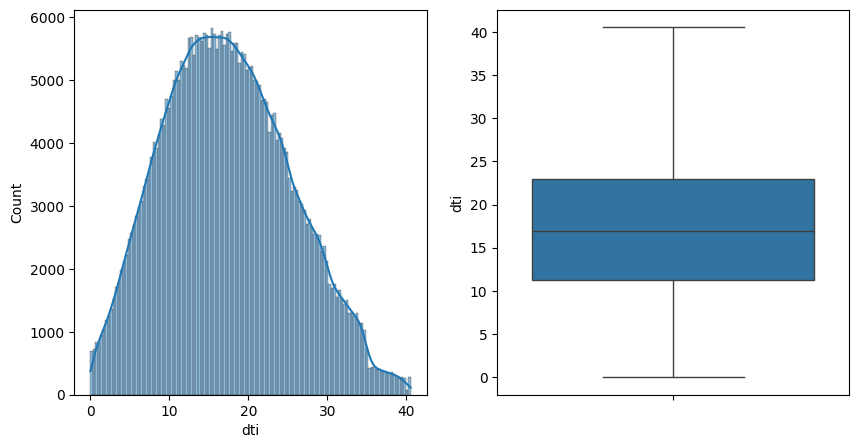

In [ ]:
plot_dist( df, 'dti' )

In [ ]:
eval_dist( df, 'dti' )

Total Rows: 396030
Q1: 11.28
Q3: 22.98
IQR: 11.700000000000001

Min: 0.0
Max: 40.53
Mean: 17.344382976037164
Median: 16.91
Total Outliers in dti: 0
Percent Outliers in dti: 0.00%

Skewness: 0.24341505929933843
Kurtosis: -0.48422305853318814

Shapiro-Wilk Test Statistic: 0.9900865976218998
p-value: 1.4806339530744209e-77



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


## Annual Income (special case)

### Feature Overview

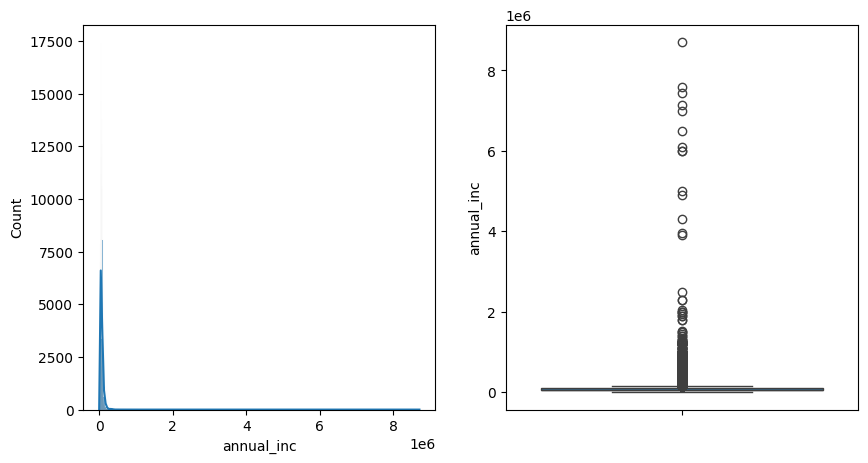

In [ ]:
plot_dist(df, 'annual_inc')

In [ ]:
eval_dist(df, 'annual_inc')

Total Rows: 396030
Q1: 45000.0
Q3: 90000.0
IQR: 45000.0

Min: 0.0
Max: 8706582.0
Mean: 74203.17579771738
Median: 64000.0
Total Outliers in annual_inc: 16700
Percent Outliers in annual_inc: 4.22%

Skewness: 41.042724746560665
Kurtosis: 4238.550571644392

Shapiro-Wilk Test Statistic: 0.46119931117012314
p-value: 3.2609232297643485e-197



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3 - q1

cut_off = 0.2e6       # 0.25e6      # 249999.96   # q3 + (1.5*iqr)  ----> results in 4+% outliers
print(f"nearest_value to {cut_off} on lesser side is :  {df[df['annual_inc'] < cut_off]['annual_inc'].max()} ")
print( (df[df['annual_inc'] > cut_off ].shape[0]  / df.shape[0]) *100 )


nearest_value to 200000.0 on lesser side is :  199999.0 
1.7531500138878369


cut off is capping 1.75% of data

### Capping Extreme Values

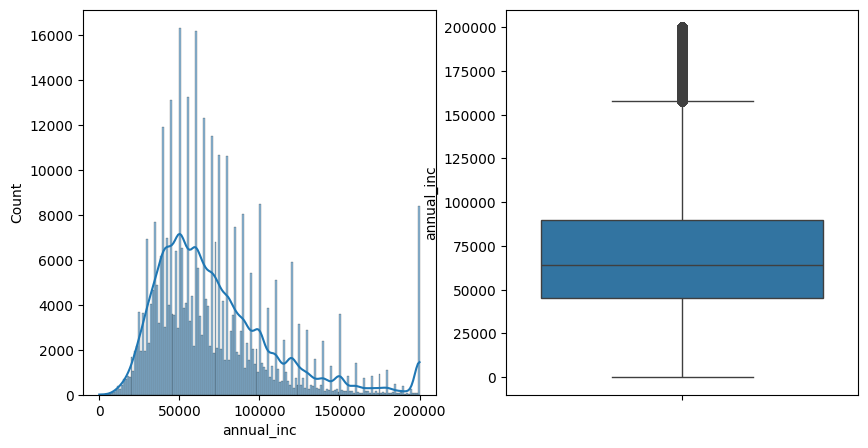

In [ ]:
df.loc[df['annual_inc'] > cut_off, 'annual_inc' ] = df[df['annual_inc'] < cut_off]['annual_inc'].max()
# df['annual_inc'] = np.log1p(df['annual_inc'])

plot_dist(df, 'annual_inc')

In [ ]:
eval_dist(df, 'annual_inc')

Total Rows: 396030
Q1: 45000.0
Q3: 90000.0
IQR: 45000.0

Min: 0.0
Max: 200000.0
Mean: 72229.92697237585
Median: 64000.0
Total Outliers in annual_inc: 16700
Percent Outliers in annual_inc: 4.22%

Skewness: 1.3304395059972127
Kurtosis: 1.886714029839946

Shapiro-Wilk Test Statistic: 0.8954993379327327
p-value: 2.345257047351112e-141



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


### Square Root to Compress the Value Range

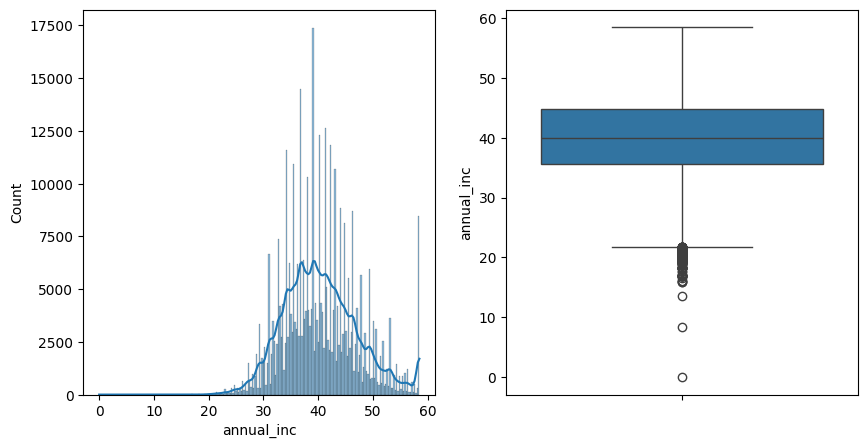

In [ ]:
df['annual_inc'] = (df['annual_inc'])**(1/3)    #0.3
plot_dist(df, 'annual_inc')

In [ ]:
eval_dist(df, 'annual_inc')

Total Rows: 396030
Q1: 35.56893304490062
Q3: 44.81404746557164
IQR: 9.245114420671023

Min: 0.0
Max: 58.48035476425731
Mean: 40.496295433787246
Median: 39.99999999999999
Total Outliers in annual_inc: 365
Percent Outliers in annual_inc: 0.09%

Skewness: 0.4164215724144286
Kurtosis: 0.09484114262795496

Shapiro-Wilk Test Statistic: 0.9848988025452727
p-value: 1.5440335344253606e-87



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


* Kurtosis has reduced with sqrt, so this transformation is suitable

## int_rate

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

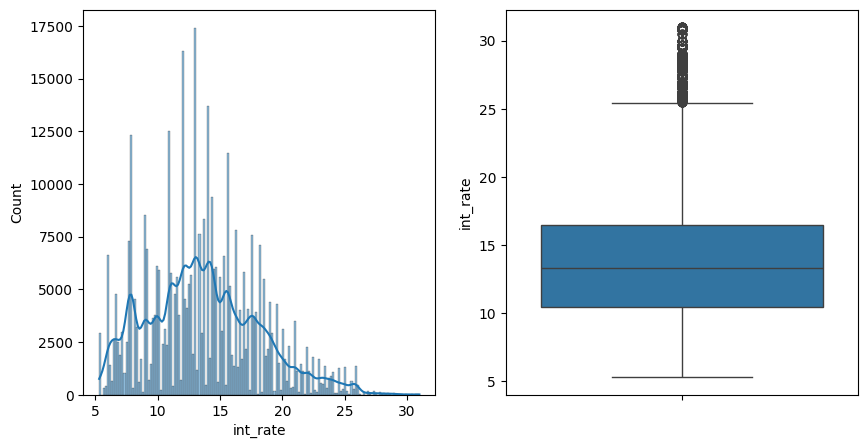

In [ ]:
plot_dist(df, 'int_rate')

In [ ]:
eval_dist(df, 'int_rate')

Total Rows: 396030
Q1: 10.49
Q3: 16.49
IQR: 5.999999999999998

Min: 5.32
Max: 30.99
Mean: 13.6394000454511
Median: 13.33
Total Outliers in int_rate: 3777
Percent Outliers in int_rate: 0.95%

Skewness: 0.4206694719582165
Kurtosis: -0.14394653809142932

Shapiro-Wilk Test Statistic: 0.981772966365056
p-value: 3.36714149848964e-92



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
q1 = df['int_rate'].quantile(0.25)
q3 = df['int_rate'].quantile(0.75)
iqr = q3 - q1

df.loc[ df['int_rate'] > (q3 + 1.5*iqr), 'int_rate' ] = q3 + 1.5*iqr

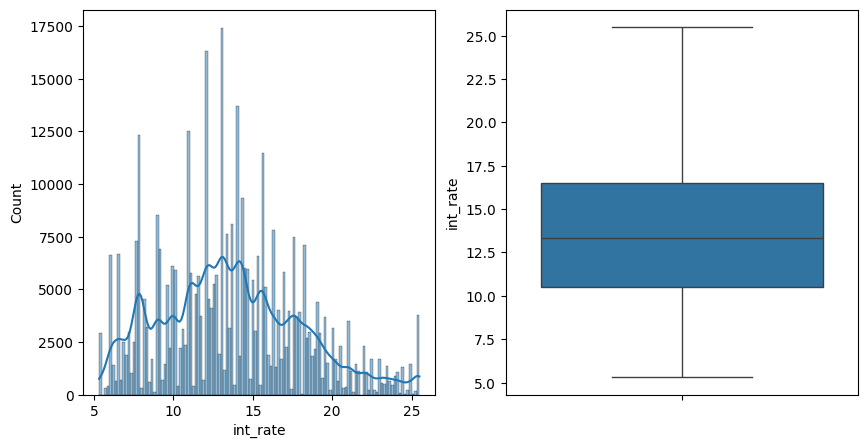

In [ ]:
plot_dist(df, 'int_rate')

## loan_amt

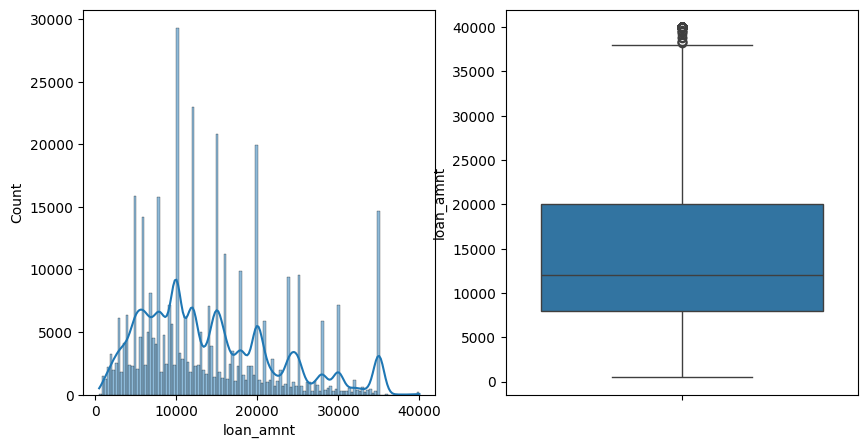

In [ ]:
plot_dist(df, 'loan_amnt')

In [ ]:
eval_dist(df, 'loan_amnt')

Total Rows: 396030
Q1: 8000.0
Q3: 20000.0
IQR: 12000.0

Min: 500.0
Max: 40000.0
Mean: 14113.888089286165
Median: 12000.0
Total Outliers in loan_amnt: 191
Percent Outliers in loan_amnt: 0.05%

Skewness: 0.777285467097746
Kurtosis: -0.0625975349858221

Shapiro-Wilk Test Statistic: 0.938523436214568
p-value: 2.6866136923061863e-125



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
q1 = df['loan_amnt'].quantile(0.25)
q3 = df['loan_amnt'].quantile(0.75)
iqr = q3 - q1

df.loc[df['loan_amnt'] > q3 + 1.5*iqr, 'loan_amnt'] = q3 + 1.5*iqr

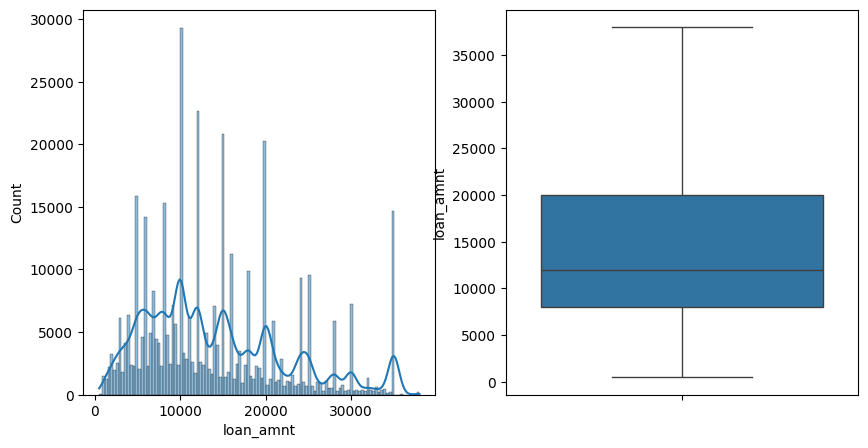

In [ ]:
plot_dist(df, 'loan_amnt')

## installment (special case)

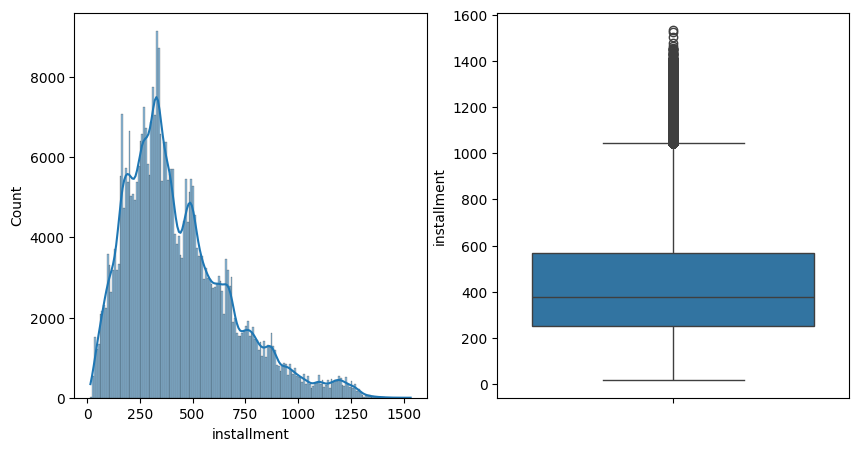

In [ ]:
plot_dist(df, 'installment')

In [ ]:
eval_dist(df, 'installment')

Total Rows: 396030
Q1: 250.33
Q3: 567.3
IQR: 316.9699999999999

Min: 16.08
Max: 1533.81
Mean: 431.84969802792716
Median: 375.43
Total Outliers in installment: 11250
Percent Outliers in installment: 2.84%

Skewness: 0.983598160890438
Kurtosis: 0.7838199212728041

Shapiro-Wilk Test Statistic: 0.935793447073033
p-value: 1.4155799268013085e-126



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


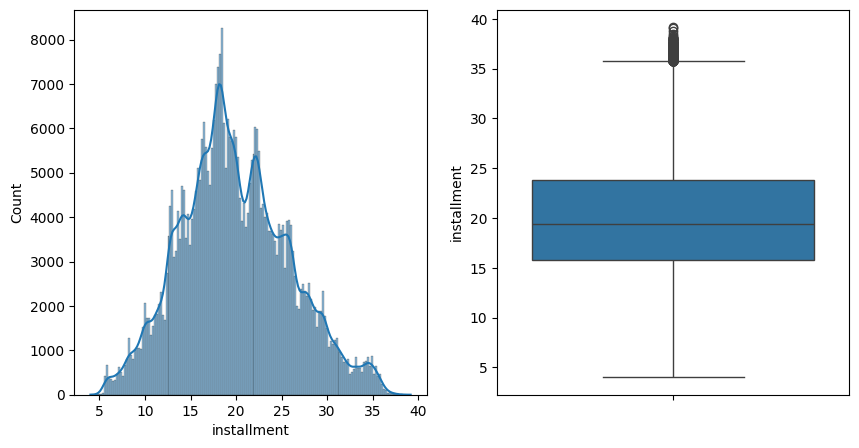

In [ ]:
# df['installment'] = np.log(df['installment'])
df['installment'] = np.sqrt(df['installment'])
plot_dist(df, 'installment')

In [ ]:
eval_dist(df, 'installment')

Total Rows: 396030
Q1: 15.821820375671063
Q3: 23.818060374430157
IQR: 7.996239998759094

Min: 4.009987531152684
Max: 39.1638864261452
Mean: 19.909409927243523
Median: 19.376016102388025
Total Outliers in installment: 907
Percent Outliers in installment: 0.23%

Skewness: 0.26130316409228166
Kurtosis: -0.22068900265408198

Shapiro-Wilk Test Statistic: 0.9928774166552737
p-value: 3.789538645519364e-70



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


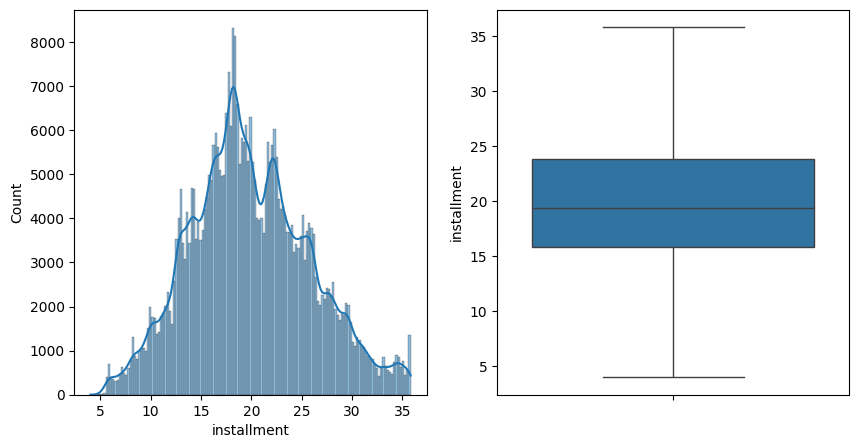

In [ ]:
q1 = df['installment'].quantile(0.25)
q3 = df['installment'].quantile(0.75)
iqr = q3 - q1

df.loc[df['installment'] > q3 + 1.5*iqr, 'installment'] = q3 + 1.5*iqr
plot_dist(df, 'installment')

In [ ]:
eval_dist(df, 'installment')

Total Rows: 396030
Q1: 15.821820375671063
Q3: 23.818060374430157
IQR: 7.996239998759094

Min: 4.009987531152684
Max: 35.812420372568795
Mean: 19.908240311588955
Median: 19.376016102388025
Total Outliers in installment: 0
Percent Outliers in installment: 0.00%

Skewness: 0.25782035126554737
Kurtosis: -0.23103889774215203

Shapiro-Wilk Test Statistic: 0.9926167997297914
p-value: 6.191505688297787e-71



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396030.
  res = hypotest_fun_out(*samples, **kwds)


# Exploring & Extracting Categorical Features

## Address

In [ ]:
# other_cols = ['address', 'title', 'emp_title', 'grade', 'sub_grade', 'issue_d' 'earliest_cr_line']
df['address'].head(3)

,address
0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


### Pin Code

In [ ]:
df['pin_code'] = df['address'].str.split().str[-1]
df['pin_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

### State

In [ ]:
df['state'] = df['address'].str.split().str[-2]
df['state'].unique()

array(['OK', 'SD', 'WV', 'MA', 'VA', 'DE', 'TX', 'AE', 'AP', 'NM', 'MS',
       'OR', 'NH', 'HI', 'PA', 'CO', 'AL', 'FL', 'AZ', 'WI', 'NC', 'IN',
       'MO', 'AA', 'TN', 'KS', 'ND', 'CT', 'WY', 'NE', 'RI', 'AR', 'MI',
       'IL', 'LA', 'NY', 'IA', 'AK', 'UT', 'MD', 'WA', 'MN', 'OH', 'MT',
       'NJ', 'DC', 'NV', 'VT', 'CA', 'ME', 'ID', 'GA', 'KY', 'SC'],
      dtype=object)

### City

In [ ]:
df['city'] = df['address'].str.split().str[-3]
df['city'].unique()

array(['Mendozaberg,', 'Loganmouth,', 'Sabrina,', ..., 'Chaneyton,',
       'Arroyofort,', 'Camachoview,'], dtype=object)

## Grade & Subgrade

In [ ]:
df[['grade', 'sub_grade']]
for g in df['grade'].unique():
  print(g, df[df['grade'] == g]['sub_grade'].unique())

B ['B4' 'B5' 'B3' 'B2' 'B1']
A ['A2' 'A1' 'A5' 'A4' 'A3']
C ['C5' 'C3' 'C1' 'C2' 'C4']
E ['E4' 'E1' 'E2' 'E5' 'E3']
D ['D1' 'D3' 'D5' 'D2' 'D4']
F ['F4' 'F5' 'F1' 'F3' 'F2']
G ['G1' 'G2' 'G5' 'G4' 'G3']


* All subgrades are sub types of grades

## issue_d

In [ ]:
df['issue_d'].head(3)

,issue_d
0,Jan-2015
1,Jan-2015
2,Jan-2015


### Issue Month

In [ ]:
df['issue_month'] = df['issue_d'].str.split('-').str[0]
df['issue_month'].unique()

array(['Jan', 'Nov', 'Apr', 'Sep', 'Oct', 'Jun', 'May', 'Dec', 'Jul',
       'Feb', 'Mar', 'Aug'], dtype=object)

### Issue Year

In [ ]:
df['issue_year'] = df['issue_d'].str.split('-').str[-1]
df['issue_year'].unique()

array(['2015', '2014', '2013', '2012', '2016', '2011', '2010', '2008',
       '2009', '2007'], dtype=object)

## earliest_cr_line

In [ ]:
df['earliest_cr_line'].head(3)

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007


### earliest_cr_year

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].str.split('-').str[-1]
df['earliest_cr_year'].unique()

array(['1990', '2004', '2007', '2006', '1999', '2005', '1994', '1997',
       '1984', '1995', '2001', '1982', '1996', '2000', '2003', '2008',
       '1998', '2002', '2009', '1992', '1988', '2010', '1986', '2012',
       '1978', '1993', '1983', '1989', '1991', '2011', '1980', '1981',
       '1987', '1985', '1967', '1972', '1969', '1979', '1965', '1977',
       '1974', '1976', '1975', '1971', '2013', '1964', '1970', '1973',
       '1963', '1960', '1966', '1961', '1968', '1958', '1955', '1953',
       '1959', '1962', '1944', '1956', '1951', '1957', '1950', '1954',
       '1948'], dtype=object)

### earliest_cr_month

In [ ]:
df['earliest_cr_month'] = df['earliest_cr_line'].str.split('-').str[0]
df['earliest_cr_month'].unique()

array(['Jun', 'Jul', 'Aug', 'Sep', 'Mar', 'Jan', 'Dec', 'May', 'Apr',
       'Oct', 'Feb', 'Nov'], dtype=object)

## Removing Other Columns

In [ ]:
# other_cols = ['address', 'title', 'emp_title', 'grade', 'sub_grade', 'issue_d' 'earliest_cr_line']

df = df.drop( ['address', 'issue_d', 'earliest_cr_line'], axis=1 )

# Univariate Analysis - Categorical Features

In [ ]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'address']

In [ ]:
def plot_bar_and_pie(df, col):
    # Set up the figure with two subplots and smaller size
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the size here

    # Barplot (left subplot)
    sns.countplot(data=df, x=col, hue=col, ax=axes[0], palette="Set2", legend=False)
    axes[0].set_title(f"Barplot of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    # Pie chart (right subplot)
    value_counts = df[col].value_counts()
    axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(value_counts)))
    axes[1].set_title(f"Pie Chart of {col}")

    # Equal aspect ratio ensures that pie chart is circular
    axes[1].axis('equal')

    # Show the plot
    plt.tight_layout()
    plt.show()



In [ ]:
cat_cols = [c for c in cat_cols if c not in [ 'address', 'title', 'emp_title', 'grade', 'sub_grade', 'loan_status' ]]
cat_cols = ['loan_status'] + cat_cols
cat_cols += ['pin_code',  'grade', 'issue_month', 'issue_year', 'earliest_cr_year', 'earliest_cr_month']      # 'state', 'city', ---> lot of nuniques

cat_cols

['loan_status',
 'term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'pin_code',
 'grade',
 'issue_month',
 'issue_year',
 'earliest_cr_year',
 'earliest_cr_month']

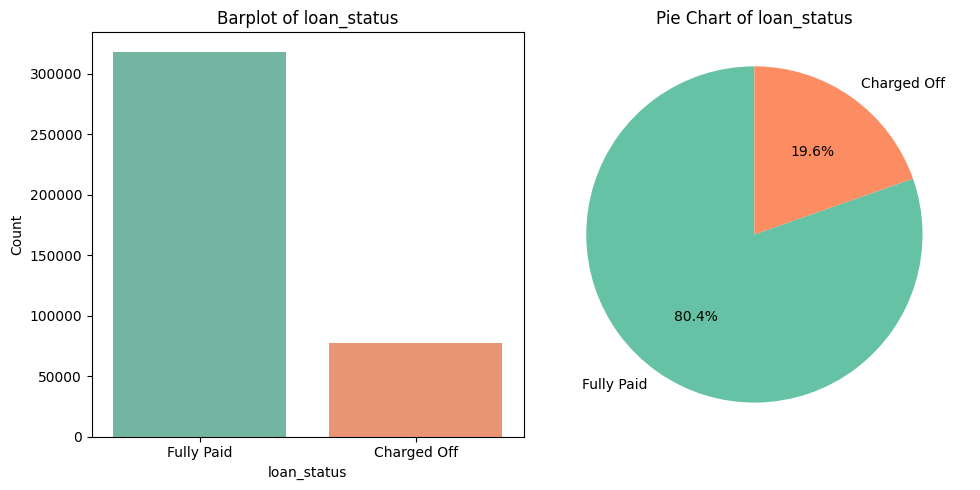

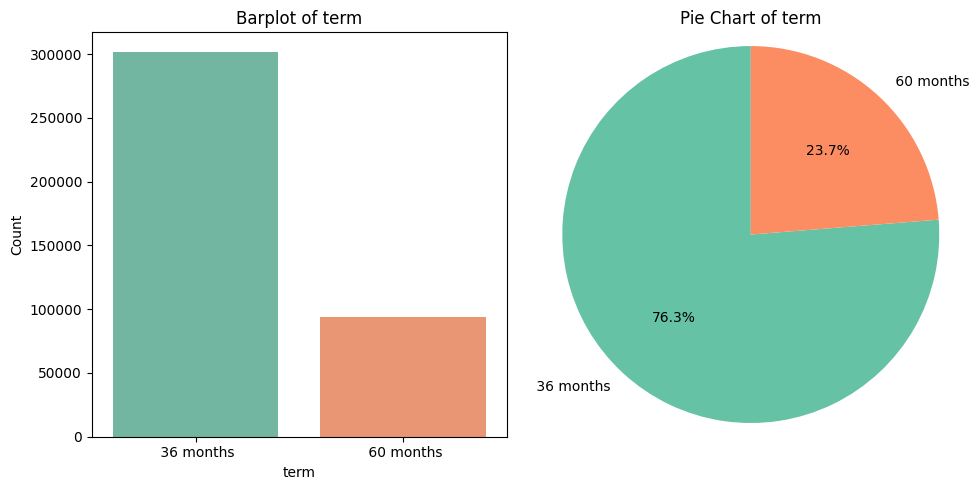

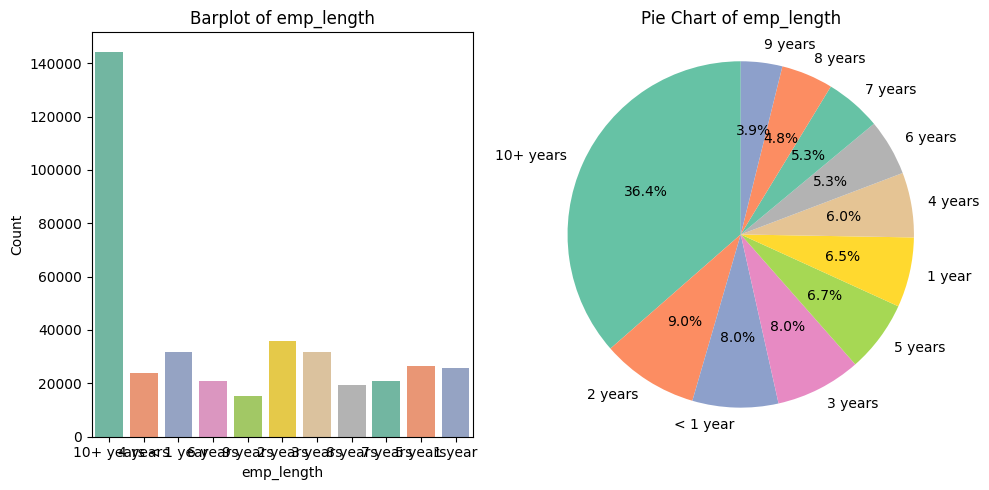

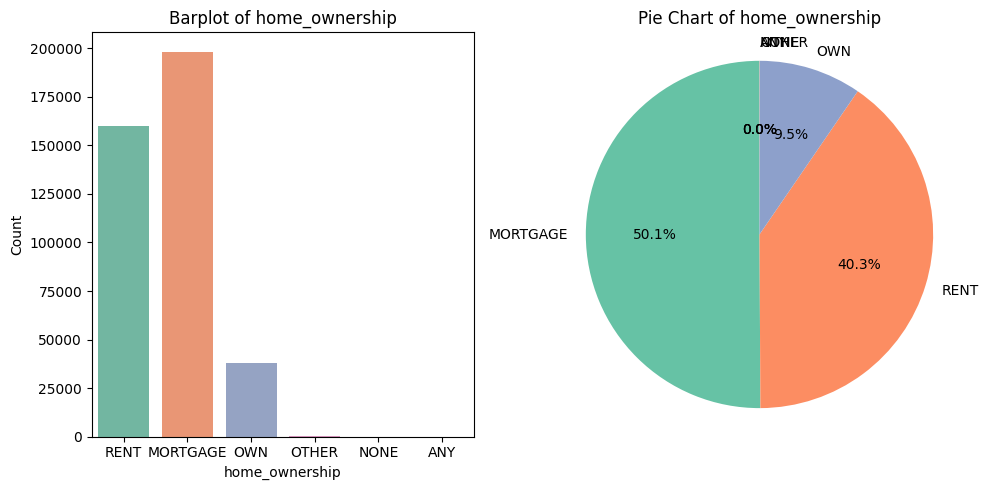

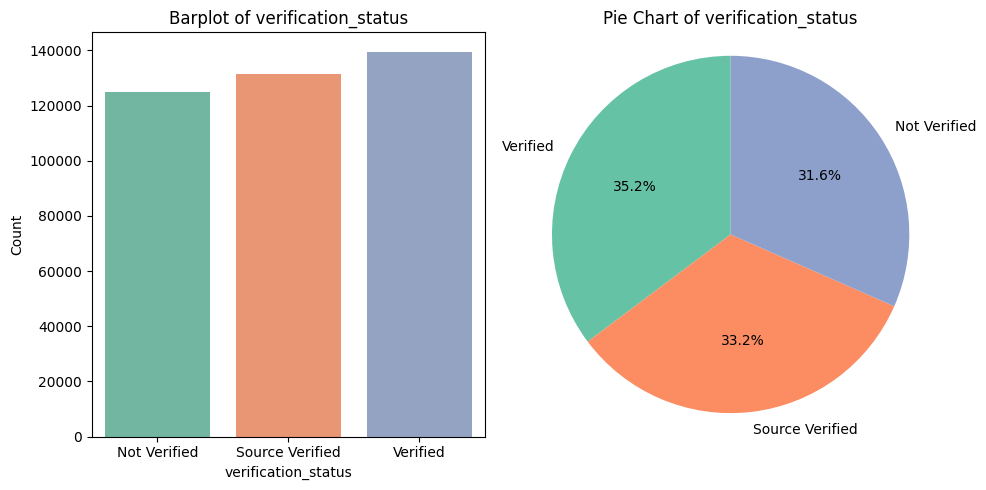

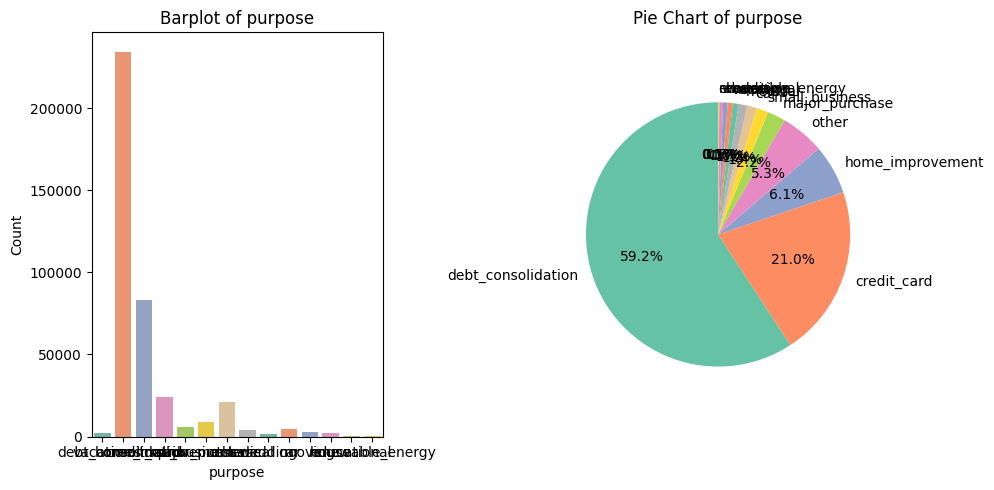

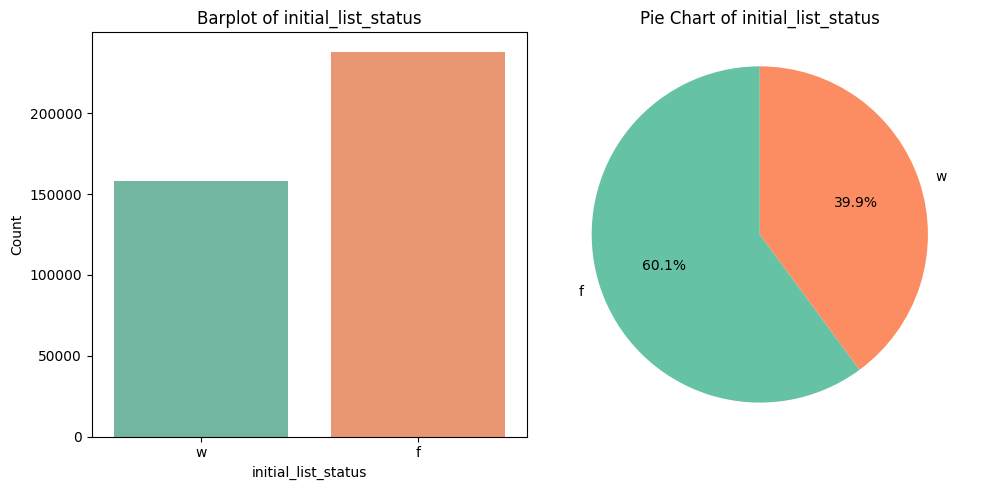

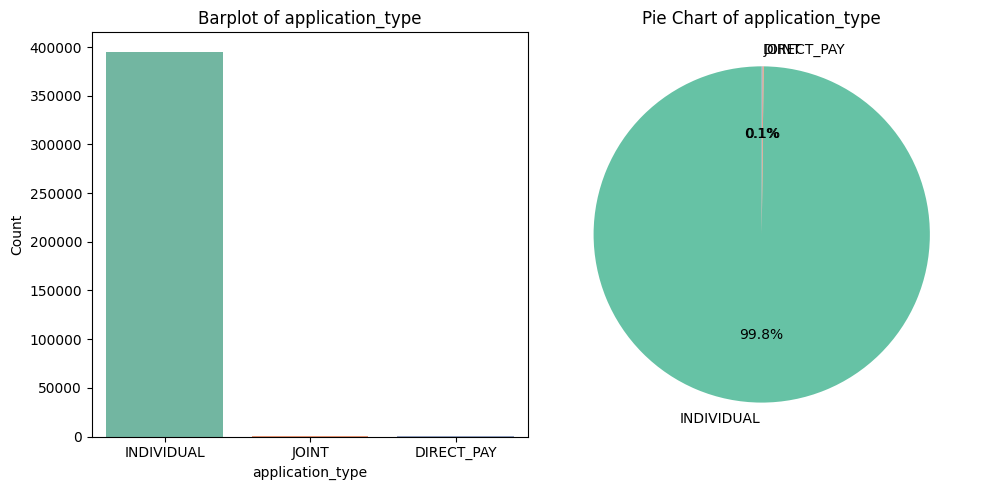

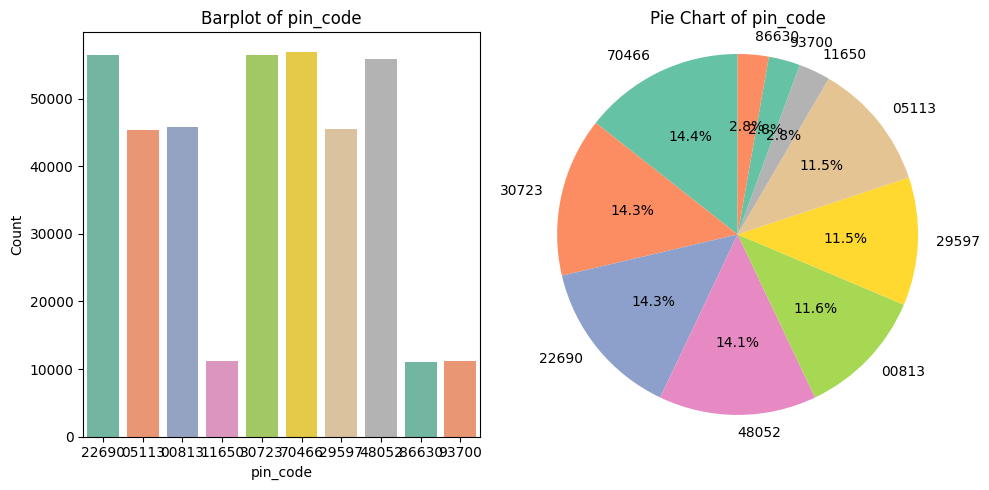

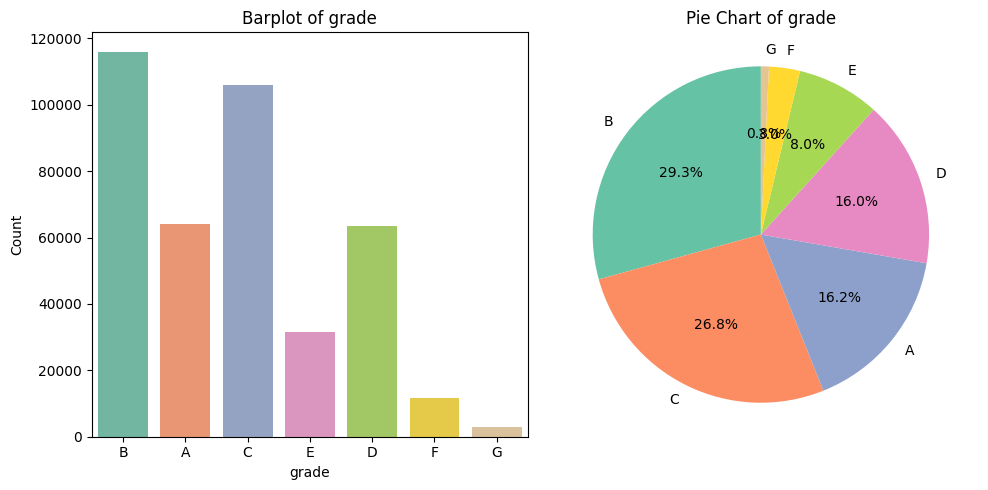

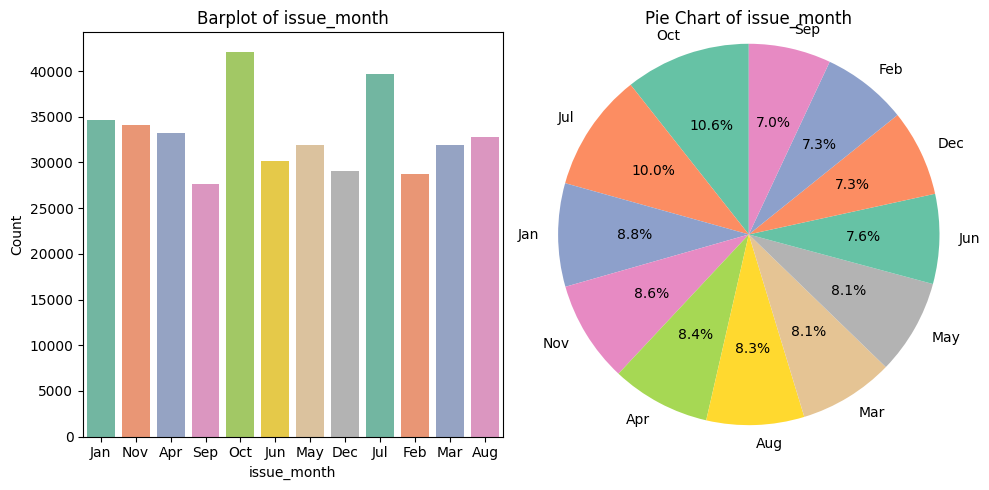

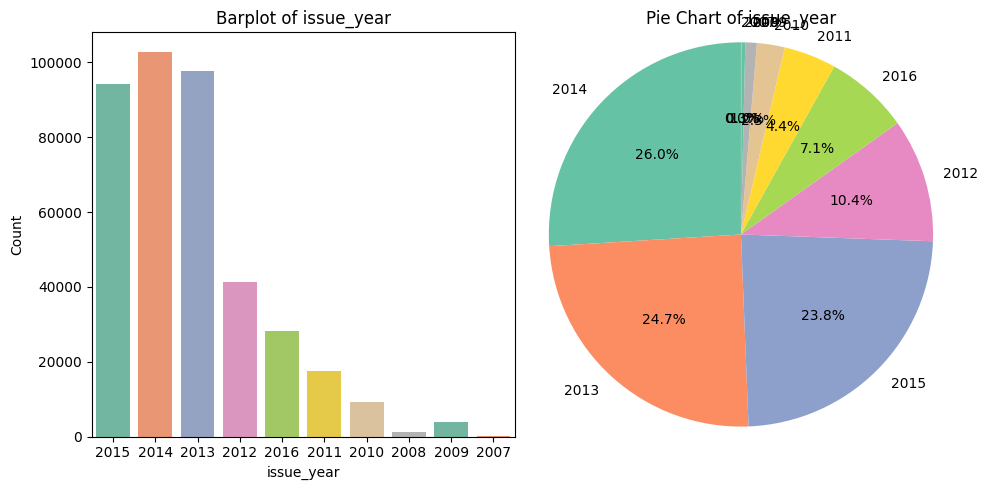

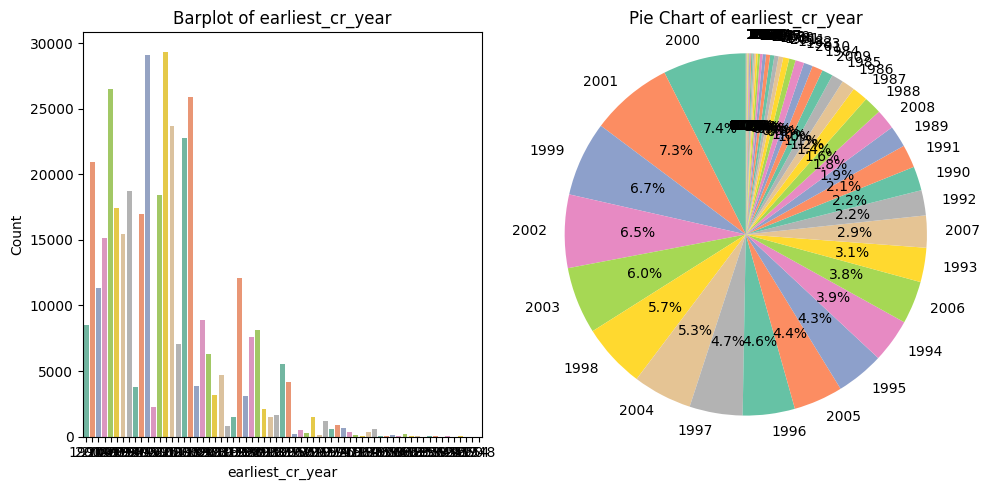

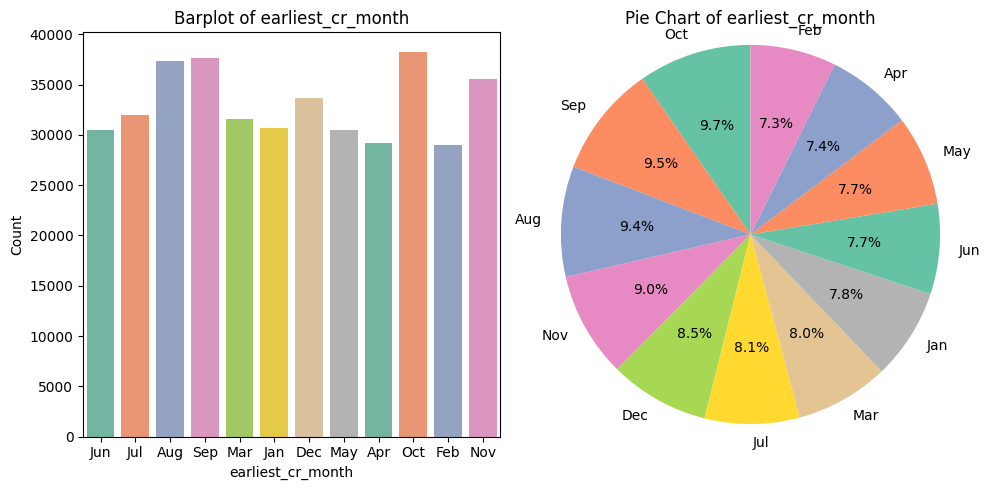

In [ ]:
for col in cat_cols:
  plot_bar_and_pie(df, col)

## application_type

In [ ]:
print(df[df['application_type'] != 'INDIVIDUAL'].shape[0])
df[df['application_type'] != 'INDIVIDUAL'].shape[0] / df.shape[0]


711


0.0017953185364745095

although less than 0.1% have application status as not Individual, this feature significance will be validated before removal

In [ ]:
# pip install category_encoders

In [ ]:
# for testing only

# from category_encoders import TargetEncoder
# te = TargetEncoder()

# df['application_type'] = te.fit_transform(df['application_type'], df['del_var'])
# df['application_type'].unique()

# Bivariate Analysis - Numerical Features

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'revol_util', 'total_acc'],
      dtype='object')

In [ ]:
# sns.pairplot(df[num_cols])

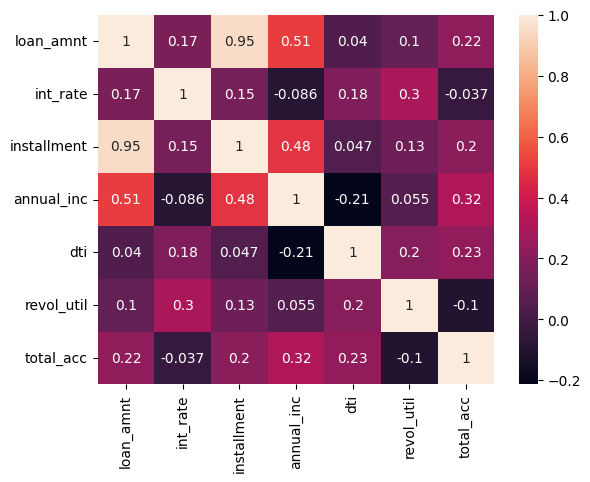

In [ ]:
sns.heatmap(df[num_cols].corr(), annot=True)      # method='spearman'
plt.show()

# Categorical Categorical Analysis

In [ ]:

def plot_parallel_bar(df, col1, col2):

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col1, hue=col2)

    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.0f}',  # Add the height (count) of each bar
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of label
            ha='center', va='center',  # Align the label at the center
            fontsize=10, color='black',  # Label properties
            xytext=(0, 8), textcoords='offset points'  # Offset the label slightly
        )

    ax.set_xlabel(col1)
    ax.set_ylabel(f"Count of {col2}")
    ax.set_title(f"Bar Chart of {col1} and {col2}")

    plt.show()


# plot_parallel_bar(df, 'application_type', 'loan_status')

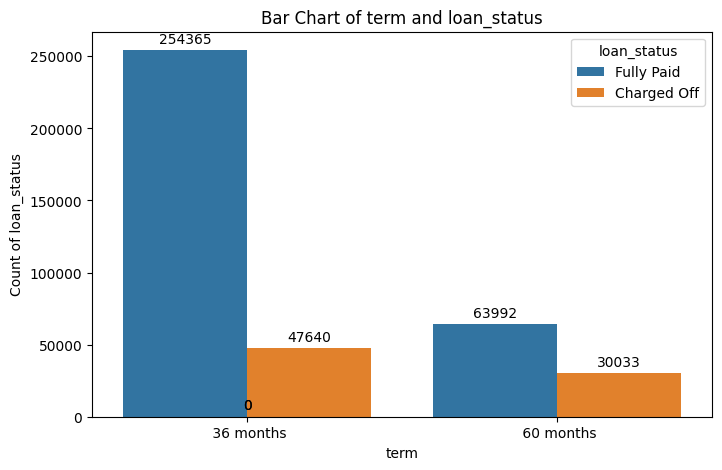

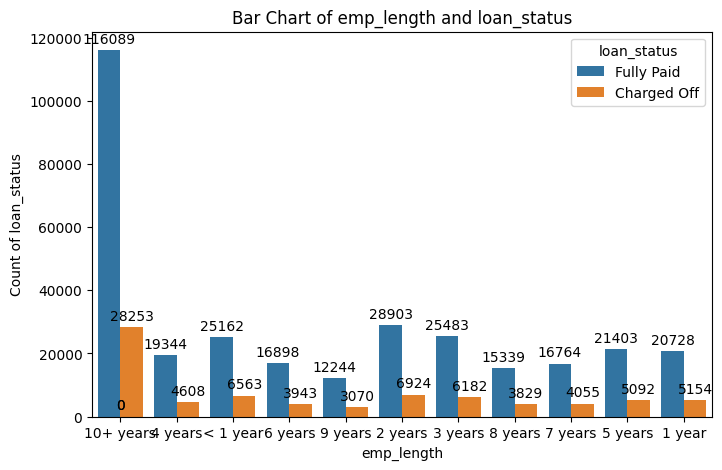

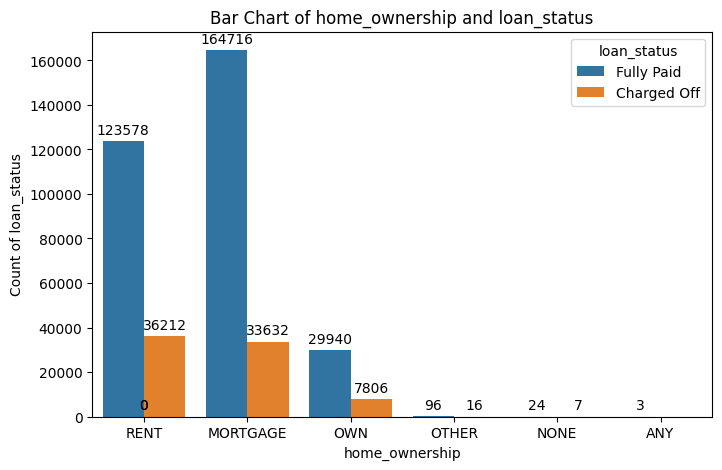

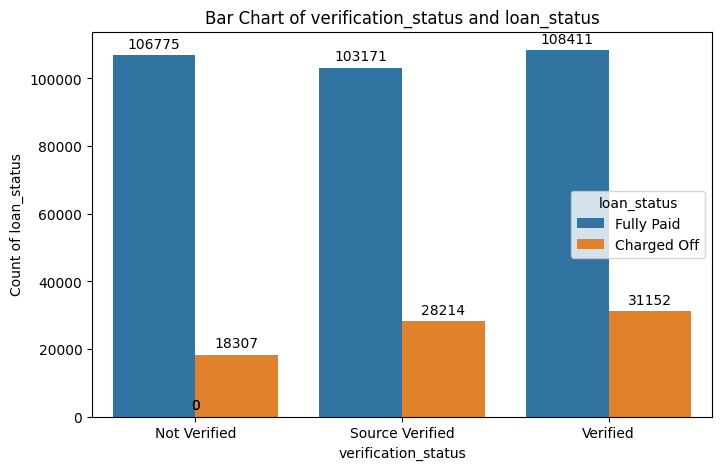

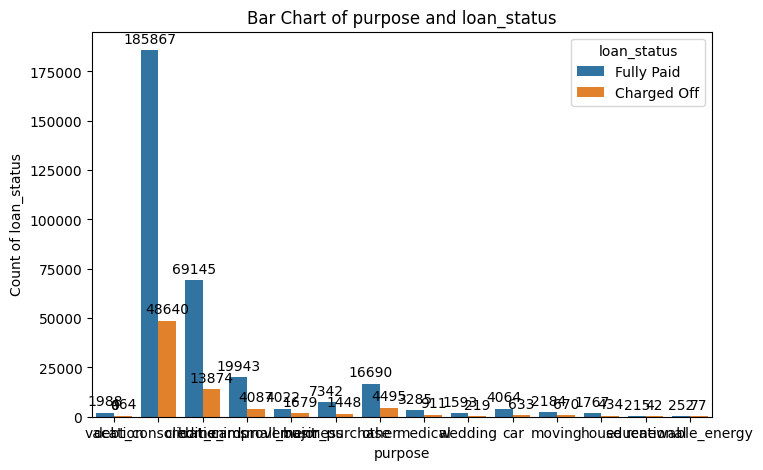

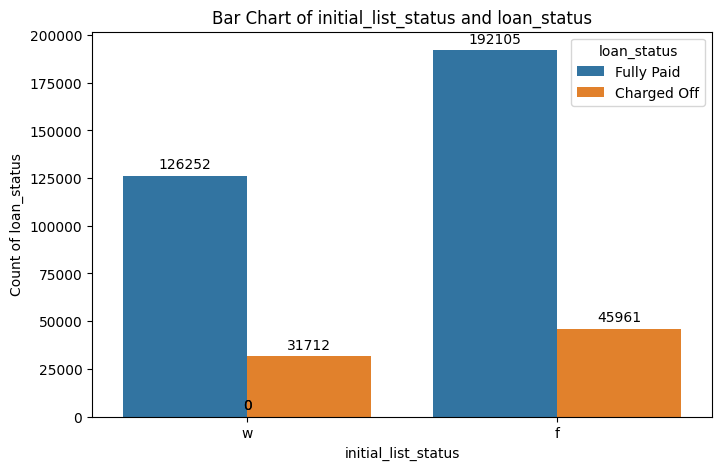

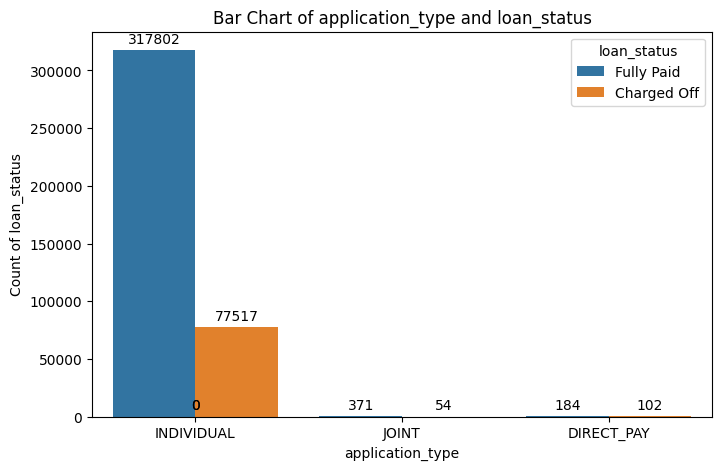

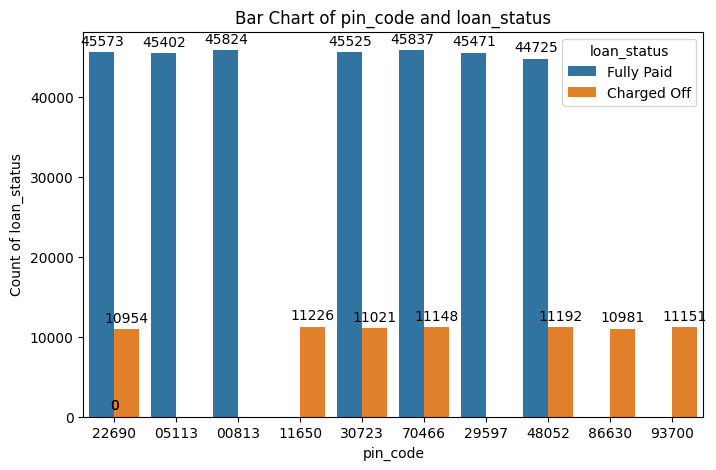

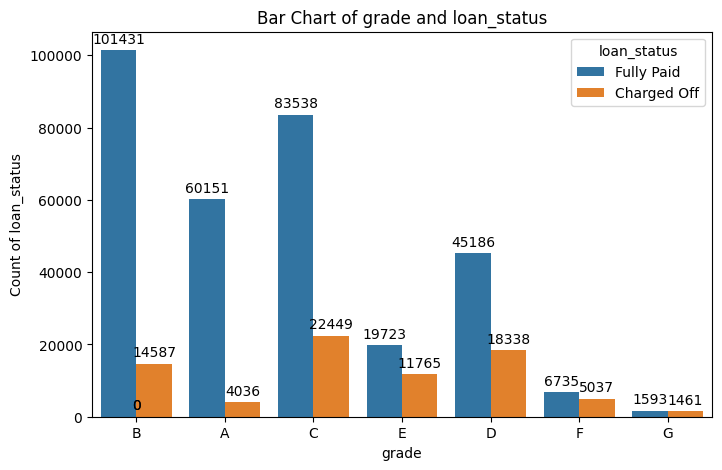

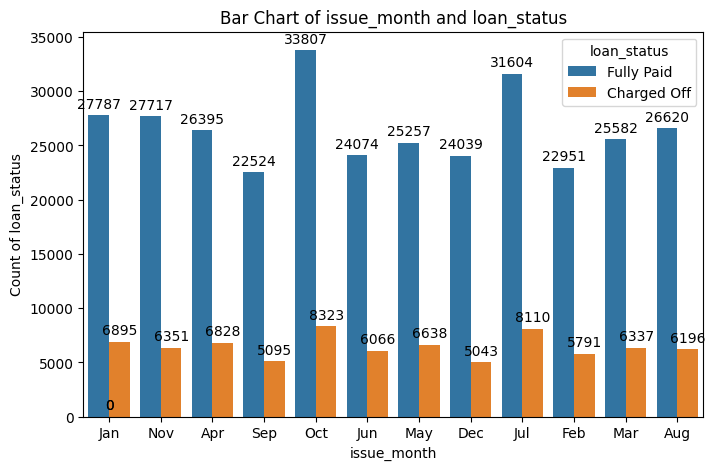

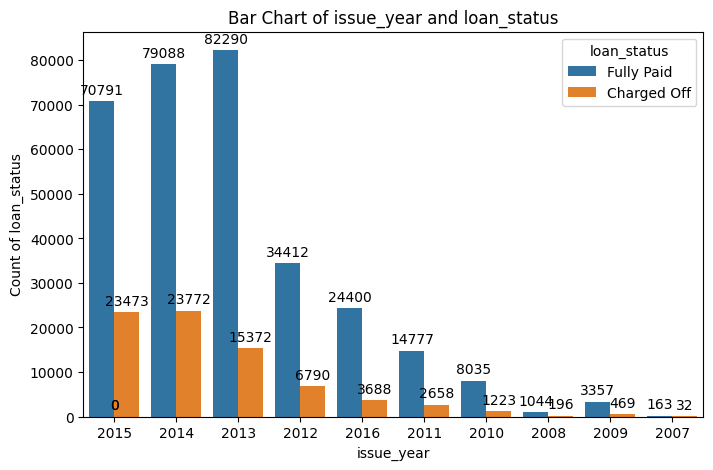

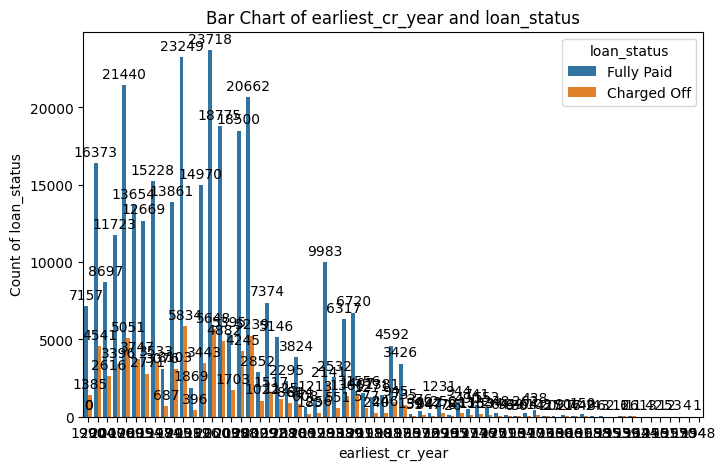

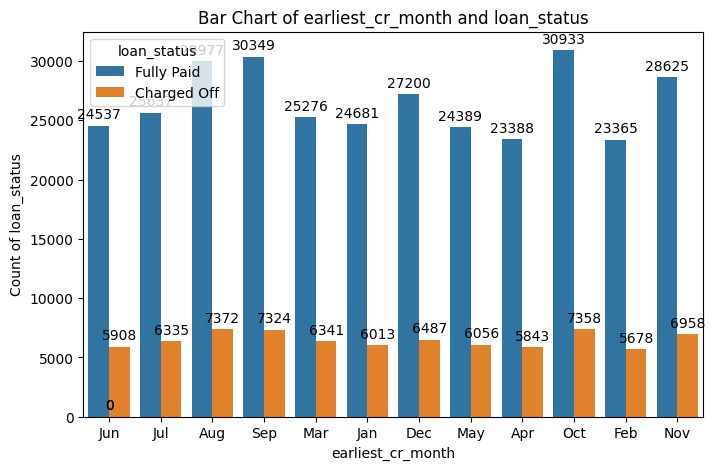

In [ ]:
cat_cols = [c for c in cat_cols if c not in ['loan_status']]

for c in cat_cols:
  plot_parallel_bar(df, c, 'loan_status')


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pin_code,state,city,issue_month,issue_year,earliest_cr_year,earliest_cr_month
0,10000.0,36 months,11.44,18.151584,B,B4,Marketing,10+ years,RENT,48.909732,Not Verified,Fully Paid,vacation,Vacation,26.24,0-18,"[0, 1)",> 19620,41.8,25.0,w,INDIVIDUAL,0-3,0,22690,OK,"Mendozaberg,",Jan,2015,1990,Jun
1,8000.0,36 months,11.99,16.299693,B,B5,Credit analyst,4 years,MORTGAGE,40.207258,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,0-18,"[0, 1)",> 19620,53.3,27.0,f,INDIVIDUAL,0-3,0,05113,SD,"Loganmouth,",Jan,2015,2004,Jul
2,15600.0,36 months,10.49,22.515994,B,B3,Statistician,< 1 year,RENT,35.049454,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,0-18,"[0, 1)",11181-19620,92.2,26.0,f,INDIVIDUAL,0-3,0,05113,WV,"Sabrina,",Jan,2015,2007,Aug
3,7200.0,36 months,6.49,14.854292,A,A2,Client Advocate,6 years,RENT,37.797631,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,0-18,"[0, 1)",0-6025,21.5,13.0,f,INDIVIDUAL,0-3,0,00813,MA,"Delacruzside,",Nov,2014,2006,Sep
4,24375.0,60 months,17.27,24.684611,C,C5,Destiny Management Inc.,9 years,MORTGAGE,38.029525,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,0-18,"[0, 1)",> 19620,69.8,43.0,f,INDIVIDUAL,0-3,0,11650,VA,"Greggshire,",Apr,2013,1999,Mar


# Train Test Splitting DataFrame

## Getting X and y

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('loan_status', axis=1)
y = df['loan_status']

num_cols = list(X.select_dtypes(include=['number']).columns)
cat_cols = [ c for c in X.columns if c not in num_cols ]

u_vals = pd.concat([pd.DataFrame({'column': [c], 'unique_vals': [X[c].nunique()]}) for c in cat_cols], ignore_index=True)
u_vals = u_vals.sort_values(by='unique_vals', ascending=False)
u_vals.reset_index(inplace=True, drop=True)
u_vals


,column,unique_vals
0,emp_title,173105
1,title,48816
2,city,27185
3,earliest_cr_year,65
4,state,54
5,sub_grade,35
6,purpose,14
7,earliest_cr_month,12
8,issue_month,12
9,emp_length,11


In [ ]:
print( X.isna().sum().sum(), y.isna().sum() )

0 0


* all features are clean!

In [ ]:
# just for testing
bin_cols = [c for c in X.columns if '_bin' in c]
bin_cols

[]

## Removing High Cardinality Features (Before Splitting)

In [ ]:
# high cardinality features can result in overfitting, and and dont carry useful information, unless aggregated
X = X.drop(list(u_vals.iloc[:3]['column']), axis=1)

In [ ]:
u_vals = u_vals.iloc[3:]
u_vals.reset_index(inplace=True, drop=True)
u_vals

,column,unique_vals
0,earliest_cr_year,65
1,state,54
2,sub_grade,35
3,purpose,14
4,earliest_cr_month,12
5,issue_month,12
6,emp_length,11
7,pin_code,10
8,issue_year,10
9,grade,7


## Removing Other Features with Issues (Before Splitting)

In [ ]:
X['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,395319
JOINT,425
DIRECT_PAY,286


In [ ]:
(425 + 286) / 395319

0.0017985475021438382

* application_type is heavily imbalanced, this should be removed, it can overfit the model

In [ ]:
# application_type is heavily imbalanced
X = X.drop(['application_type'], axis=1)

# updating u_vals
u_vals = u_vals[u_vals['column'] != 'application_type']
u_vals.reset_index(inplace=True, drop=True)
u_vals

,column,unique_vals
0,earliest_cr_year,65
1,state,54
2,sub_grade,35
3,purpose,14
4,earliest_cr_month,12
5,issue_month,12
6,emp_length,11
7,pin_code,10
8,issue_year,10
9,grade,7


## Train Test Validation Splitting

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_val_index, test_index in sss.split(X, y):
    X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]  # Use iloc to index
    y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]  # Use iloc to index

sss_train_val = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, val_index in sss_train_val.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]  # Use iloc to index
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]  # Use iloc to index

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(237618, 26) (237618,)
(79206, 26) (79206,)
(79206, 26) (79206,)


# Encoding Categorical Features

## Binary Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_cat = u_vals[u_vals['unique_vals'] == 2]['column'].to_list()
binary_cat

le = LabelEncoder()

for c in binary_cat:
  X_train[c] = le.fit_transform(X_train[c])

  X_val[c] = le.transform(X_val[c])
  X_test[c] = le.transform(X_test[c])

# le.fit_transform(X_train)

y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


<ipython-input-237-266bcb32dace>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[c] = le.fit_transform(X_train[c])
<ipython-input-237-266bcb32dace>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[c] = le.transform(X_val[c])
<ipython-input-237-266bcb32dace>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
u_vals

,column,unique_vals
0,earliest_cr_year,65
1,state,54
2,sub_grade,35
3,purpose,14
4,earliest_cr_month,12
5,issue_month,12
6,emp_length,11
7,pin_code,10
8,issue_year,10
9,grade,7


## One-Hot Encoding

In [ ]:
X_train_ref = X_train.copy()    # for testing only

# performing ohe for vars with 3 to 6 unique vals
ohe_cols = u_vals[ (u_vals['unique_vals'] > 2) & (u_vals['unique_vals'] < 7) ]['column'].to_list()
# print(ohe_cols)

X_train[ohe_cols].head()

,home_ownership,open_acc,pub_rec,revol_bal,mort_acc,pub_rec_bankruptcies,verification_status
350368,RENT,0-18,"[0, 1)",> 19620,0-3,0,Not Verified
87836,MORTGAGE,0-18,"[1, 5)",11181-19620,0-3,1,Not Verified
216871,RENT,0-18,"[0, 1)",0-6025,0-3,0,Not Verified
119417,RENT,0-18,"[0, 1)",> 19620,0-3,0,Source Verified
56788,RENT,0-18,"[0, 1)",> 19620,0-3,0,Verified


In [ ]:
X_train = pd.get_dummies(X_train, columns=ohe_cols)
X_val = pd.get_dummies(X_val, columns=ohe_cols)
X_test = pd.get_dummies(X_test, columns=ohe_cols)


In [ ]:
new_ohe_cols = [c for c in X_train.columns if any(ohe_cols[i] in c for i in range(len(ohe_cols)))]
X_train[new_ohe_cols].head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,open_acc_0-18,open_acc_18-30,open_acc_30-42,open_acc_42-54,open_acc_54-90,"pub_rec_[0, 1)","pub_rec_[1, 5)","pub_rec_[5, 10)","pub_rec_[10, 30)","pub_rec_[30, inf)",revol_bal_0-6025,revol_bal_6025-11181,revol_bal_11181-19620,revol_bal_> 19620,mort_acc_0-3,mort_acc_3-10,mort_acc_10-20,mort_acc_20-34,pub_rec_bankruptcies_0,pub_rec_bankruptcies_1,pub_rec_bankruptcies_More_than_1,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
350368,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False
87836,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False
216871,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False
119417,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
56788,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True


In [ ]:
# replacing True/False with 0/1
for c in new_ohe_cols:
  X_train[c] = le.fit_transform(X_train[c])

  X_val[c] = le.transform(X_val[c])
  X_test[c] = le.transform(X_test[c])

X_train[new_ohe_cols].head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,open_acc_0-18,open_acc_18-30,open_acc_30-42,open_acc_42-54,open_acc_54-90,"pub_rec_[0, 1)","pub_rec_[1, 5)","pub_rec_[5, 10)","pub_rec_[10, 30)","pub_rec_[30, inf)",revol_bal_0-6025,revol_bal_6025-11181,revol_bal_11181-19620,revol_bal_> 19620,mort_acc_0-3,mort_acc_3-10,mort_acc_10-20,mort_acc_20-34,pub_rec_bankruptcies_0,pub_rec_bankruptcies_1,pub_rec_bankruptcies_More_than_1,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
350368,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
87836,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
216871,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
119417,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
56788,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [ ]:
print( X_train.isna().sum().sum() )

0


### Removing OHE col (One Each)

In [ ]:
# removing ohe, one each from col else they will give inf vif
not_reqd_ohe = []

for col in ohe_cols:
  matches = [c for c in X_train.columns if col in c ]
  not_reqd_ohe.append(matches[0])

print(not_reqd_ohe)

for c in not_reqd_ohe:
  X_train = X_train.drop(c, axis=1)
  X_val = X_val.drop(c, axis=1)
  X_test = X_test.drop(c, axis=1)


['home_ownership_ANY', 'open_acc_0-18', 'pub_rec_[0, 1)', 'revol_bal_0-6025', 'mort_acc_0-3', 'pub_rec_bankruptcies_0', 'verification_status_Not Verified']


## Target Encoding

In [ ]:
u_vals = u_vals[u_vals['column'] != 'application_type']
u_vals = u_vals[(~u_vals['column'].isin(ohe_cols)) & (~u_vals['column'].isin(binary_cat))]

u_vals.reset_index(inplace=True, drop=True)

u_vals

,column,unique_vals
0,earliest_cr_year,65
1,state,54
2,sub_grade,35
3,purpose,14
4,earliest_cr_month,12
5,issue_month,12
6,emp_length,11
7,pin_code,10
8,issue_year,10
9,grade,7


In [ ]:
pip install category_encoders

In [ ]:
print(X_train.shape, y_train.shape)

(237618, 42) (237618,)


In [ ]:
from category_encoders import TargetEncoder

# te = TargetEncoder()

te_cols = u_vals['column'].to_list()

print(te_cols)

for c in te_cols:
  te = TargetEncoder(cols=[c])

  X_train[c] = te.fit_transform(X_train[c], y_train)

  X_val[c] = te.transform(X_val[c])
  X_test[c] = te.transform(X_test[c])


['earliest_cr_year', 'state', 'sub_grade', 'purpose', 'earliest_cr_month', 'issue_month', 'emp_length', 'pin_code', 'issue_year', 'grade']


In [ ]:
print(X_train.dtypes, len(X_train.columns) )

loan_amnt                              float64
term                                     int64
int_rate                               float64
installment                            float64
grade                                  float64
sub_grade                              float64
emp_length                             float64
annual_inc                             float64
purpose                                float64
dti                                    float64
revol_util                             float64
total_acc                              float64
initial_list_status                      int64
pin_code                               float64
state                                  float64
issue_month                            float64
issue_year                             float64
earliest_cr_year                       float64
earliest_cr_month                      float64
home_ownership_MORTGAGE                  int64
home_ownership_NONE                      int64
home_ownershi

* All Columns have been encoded

In [ ]:
type(y_train)
type(X[c])

pandas.core.series.Series

# Stadardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=x_cols)
X_val = pd.DataFrame(X_val, columns=x_cols)
X_test = pd.DataFrame(X_test, columns=x_cols)


# Checking VIFs

## Dropping High VIFs

## Function

In [ ]:
def get_vif(df):

  vif = pd.DataFrame()

  vif['features'] = df.columns
  vif['vif'] = [ variance_inflation_factor(df.values, i) for i in range( df.shape[1])]
  vif = vif.sort_values(by='vif', ascending=False)
  vif.reset_index(drop=True, inplace=True)

  return vif

### Dropping from num_cols (Runs Faster)

In [ ]:
# Due to high Computationally Efficienncy, calculating vifs on num_cols first
get_vif(X_train[num_cols])

,features,vif
0,loan_amnt,10.840119
1,installment,10.345443
2,annual_inc,1.707828
3,total_acc,1.295092
4,dti,1.290404
5,revol_util,1.200225
6,int_rate,1.181217


In [ ]:
X_train = X_train.drop('loan_amnt', axis=1)
X_val = X_val.drop('loan_amnt', axis=1)
X_test = X_test.drop('loan_amnt', axis=1)

num_cols.remove('loan_amnt')
get_vif(X_train[num_cols])

,features,vif
0,annual_inc,1.644760
1,installment,1.407155
2,total_acc,1.294206
3,dti,1.289162
4,revol_util,1.187169
5,int_rate,1.160111


### Dropping te_cols (VIF calc Runs Faster)

In [ ]:
# Due to high Computationally Efficienncy, calculating vifs on num_cols first
get_vif(X_train[te_cols])

,features,vif
0,sub_grade,23.337878
1,grade,23.249307
2,pin_code,1.034612
3,purpose,1.033883
4,issue_year,1.025042
5,earliest_cr_year,1.019750
6,issue_month,1.009977
7,emp_length,1.002920
8,earliest_cr_month,1.001182
9,state,1.000221


In [ ]:
X_train = X_train.drop('sub_grade', axis=1)
X_val = X_val.drop('sub_grade', axis=1)
X_test = X_test.drop('sub_grade', axis=1)

te_cols.remove('sub_grade')
get_vif(X_train[te_cols])

,features,vif
0,grade,1.078425
1,pin_code,1.033377
2,purpose,1.032123
3,issue_year,1.024808
4,earliest_cr_year,1.019244
5,issue_month,1.009938
6,emp_length,1.002919
7,earliest_cr_month,1.001176
8,state,1.000221


## Removing All High VIFs

In [ ]:
get_vif(X_train)

,features,vif
0,home_ownership_MORTGAGE,59422.147841
1,home_ownership_RENT,57187.371084
2,home_ownership_OWN,20503.407617
3,home_ownership_OTHER,64.000283
4,home_ownership_NONE,16.003135
5,int_rate,11.370261
6,grade,11.154007
7,"pub_rec_[1, 5)",4.151059
8,pub_rec_bankruptcies_1,3.966080
9,revol_bal_> 19620,2.778851


In [ ]:
X_train = X_train.drop('home_ownership_MORTGAGE', axis=1)
X_val = X_val.drop('home_ownership_MORTGAGE', axis=1)
X_test = X_test.drop('home_ownership_MORTGAGE', axis=1)

get_vif(X_train)

,features,vif
0,int_rate,11.370208
1,grade,11.153969
2,"pub_rec_[1, 5)",4.151051
3,pub_rec_bankruptcies_1,3.966080
4,revol_bal_> 19620,2.778846
5,revol_bal_11181-19620,2.040115
6,annual_inc,1.829689
7,total_acc,1.803163
8,revol_bal_6025-11181,1.692282
9,installment,1.628939


In [ ]:
X_train = X_train.drop('int_rate', axis=1)
X_val = X_val.drop('int_rate', axis=1)
X_test = X_test.drop('int_rate', axis=1)

get_vif(X_train)

,features,vif
0,"pub_rec_[1, 5)",4.150636
1,pub_rec_bankruptcies_1,3.965051
2,revol_bal_> 19620,2.770246
3,revol_bal_11181-19620,2.038073
4,annual_inc,1.820172
5,total_acc,1.802923
6,revol_bal_6025-11181,1.691987
7,grade,1.649440
8,installment,1.618169
9,verification_status_Verified,1.600360


* All High VIFs have been removed!!

# Logistic Regression

## Function

In [ ]:
def get_train_scores(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score


## Imbalance Overview

In [ ]:
print(type(y_train), type(y_test), type(y_val))     # le converted them to np arrays

y_train = pd.Series(y_train)
y_val = pd.Series(y_val)
y_test = pd.Series(y_test)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
y_train.value_counts()

,count
1,191015
0,46603


In [ ]:
46603 / (191015 + 46603)

0.1961257143819071

* Dataset is Imbalanced (almost 80-20% ratio)

In [ ]:
191015 / 46603

4.098770465420681

## Imbalance Treatment - Assigning Weights

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight = {0:4.1, 1:1})

model.fit(X_train, y_train)

train_y_pred = model.predict(X_train)

# train_score = f1_score(y_train, train_y_pred)
f1_score(y_train, train_y_pred)

0.8725825728708222

In [ ]:
val_y_pred = model.predict(X_val)
val_score = f1_score(y_val, val_y_pred)
val_score

0.8744118589473329

### Confusion Matrix

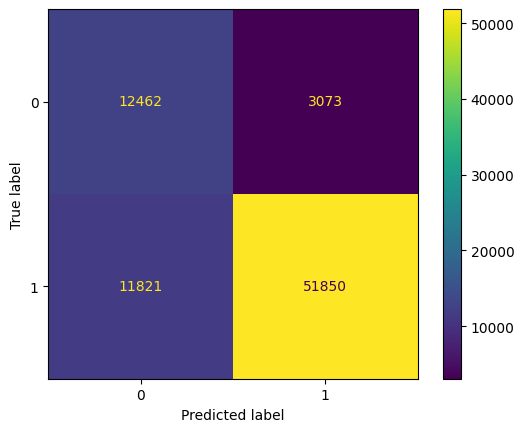

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

### Precision

In [ ]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

precision_calc(conf_matrix)

0.9440489412450157

### AUC/ROC

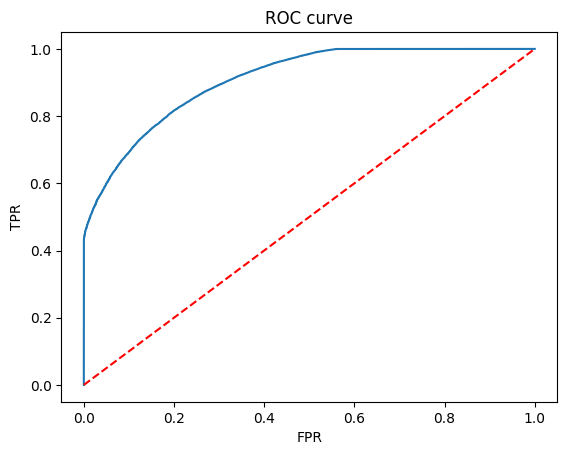

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

probability = model.predict_proba(X_val)
probabilites = probability[:,1]

fpr, tpr, thr = roc_curve(y_val,probabilites)

plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Imbalance Treatment - OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Performing OverSampling
oversampler = RandomOverSampler()

print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

# Model Training & Evaluation
model = LogisticRegression()
f1_train,f1_test = get_train_scores(model, X_train_oversampled, y_train_oversampled, X_test, y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
1    191015
0     46603
Name: count, dtype: int64
After Oversampling
1    191015
0    191015
Name: count, dtype: int64
Training F1 score:0.8065202647395869, Testing F1 score:0.8729585639087596


* Train Score has surprisingly dropped, while model test score is retained higher.
* This means, Model is more accurate on predicting Majority Class than Minority Class, since test set has lesser minority class it outperformed.
* Since Test Score is almost same, model oversampling has not improved results.

### Confusion Matrix

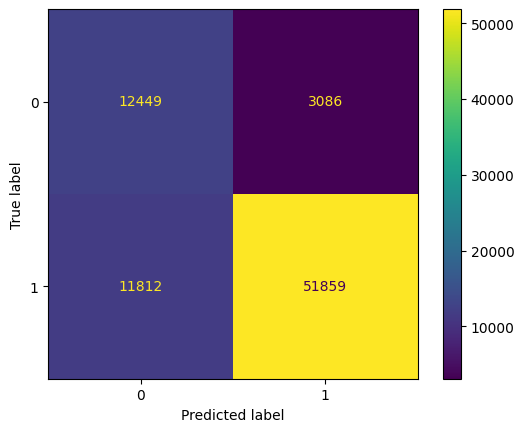

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

* FP is dangerous for our situation, a person cannot repay the Loan and is awarded a Loan.  

### Precision (as FP is dangerous)

In [ ]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

precision_calc(conf_matrix)

0.9438347438347439

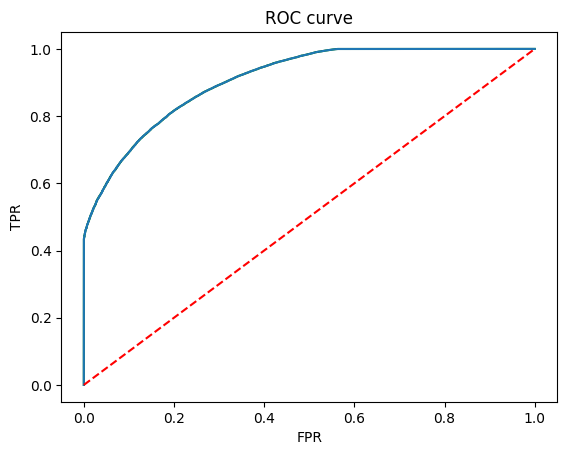

In [ ]:
probability = model.predict_proba(X_val)
probabilites = probability[:,1]

fpr1, tpr1, thr = roc_curve(y_val,probabilites)

plt.plot(fpr,tpr, color='green')
plt.plot(fpr1,tpr1)

#random model
plt.plot(fpr1,fpr1,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Imbalance Treatment - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

# Model Training & Evaluation
model = LogisticRegression()

f1_train,f1_test = get_train_scores(model,X_sm, y_sm,X_val,y_val)

print(f'Training F1 score:{f1_train}, Validation F1 score:{f1_test}')


Before SMOTE
1    191015
0     46603
Name: count, dtype: int64
After Oversampling
1    191015
0    191015
Name: count, dtype: int64
Training F1 score:0.8088772342316746, Validation F1 score:0.8738519149510403


* Train Score has again dropped, while model test score is retained higher.
* This means, Model is more accurate on predicting Majority Class than Minority Class, since test set has lesser minority class it outperformed.
* Since Test Score is almost same, SMOTE has not improved results.

### Confusion Matrix

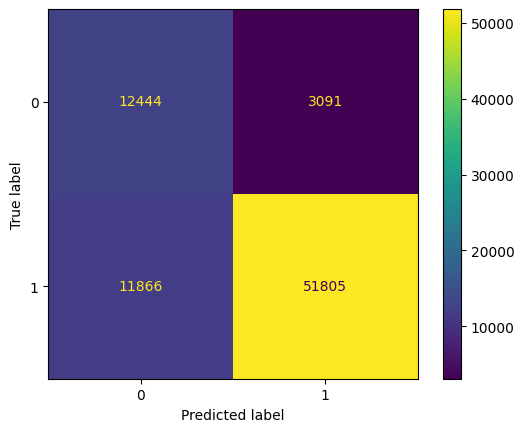

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

### Precision

In [ ]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

precision_calc(conf_matrix)

0.9436935295832118

### AUC/ROC

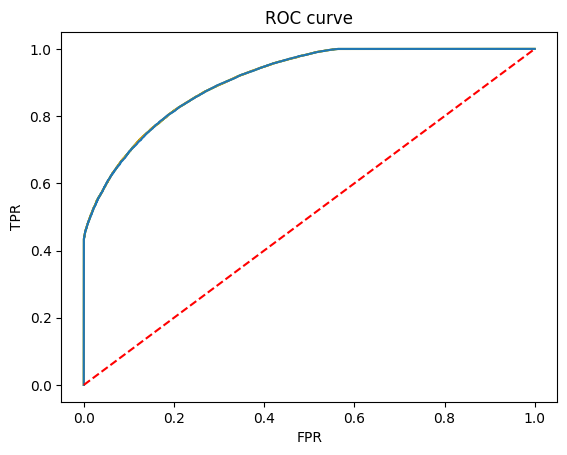

In [ ]:
probability = model.predict_proba(X_val)
probabilites = probability[:,1]

fpr2, tpr2, thr = roc_curve(y_val,probabilites)

plt.plot(fpr,tpr, color='green')
plt.plot(fpr2,tpr2, color='orange')
plt.plot(fpr2,tpr2)

#random model
plt.plot(fpr1,fpr1,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Optimization

In [ ]:
train_scores = []
val_scores = []

for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda

  model = LogisticRegression(C=1/la, class_weight = {0:4.1, 1:1})
  model.fit(X_train, y_train)

  y_pred = model.predict(X_train)
  conf_matrix = confusion_matrix(y_train, y_pred)
  train_score = precision_calc(conf_matrix)
  train_scores.append(train_score)

  y_pred = model.predict(X_val)
  conf_matrix = confusion_matrix(y_val, y_pred)
  val_score = precision_calc(conf_matrix)
  val_scores.append(val_score)

In [ ]:
# len(train_scores)

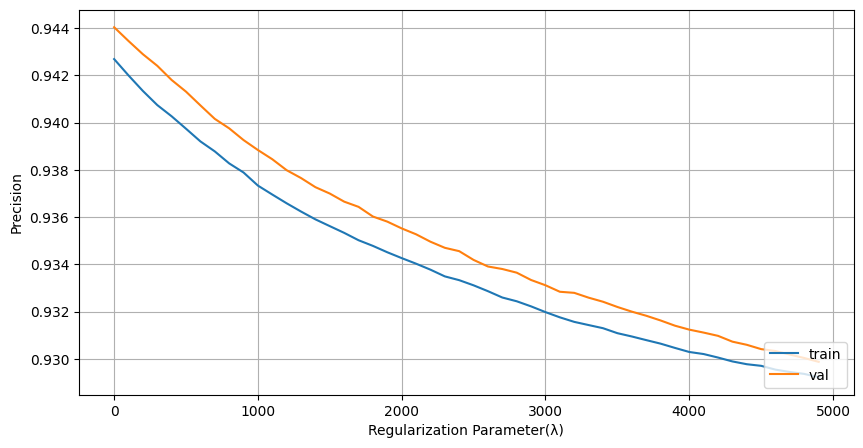

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Precision")
plt.grid()
plt.show()

# Final Model

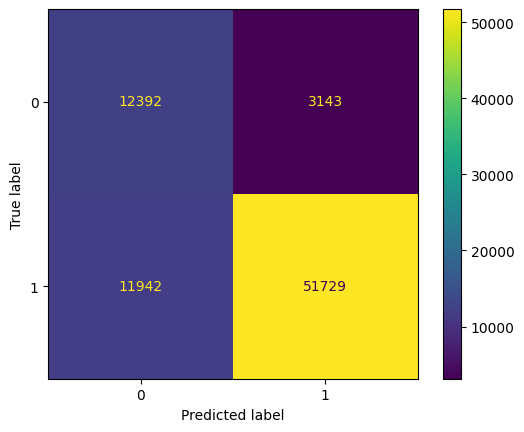

In [ ]:
model = LogisticRegression(class_weight = {0:4.1, 1:1})

model.fit(X_train, y_train)

train_y_pred = model.predict(X_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
prec = precision_calc(conf_matrix)
print(f"Precision of Final Model: {prec}")

Precision of Final Model: 0.9427212421635807


## AUC/ROC

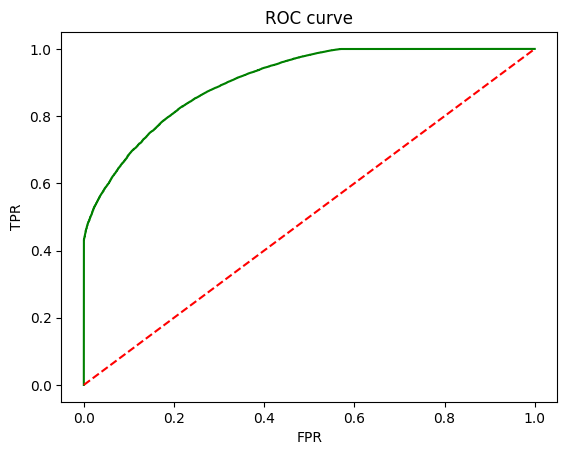

In [ ]:
probability = model.predict_proba(X_test)
probabilites = probability[:,1]

fpr2, tpr2, thr = roc_curve(y_test,probabilites)

plt.plot(fpr2,tpr2, color='green')


#random model
plt.plot(fpr2,fpr2,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Coefficients

In [ ]:
sorted_coef_dict = dict(sorted(zip(X_train.columns.to_list(), model.coef_[0]), key=lambda item: item[1], reverse=True))
sorted_coef_dict

{'pin_code': 9.12913409779421,
 'grade': 0.4302566939515996,
 'annual_inc': 0.2349782709173531,
 'issue_year': 0.23300821083154827,
 'open_acc_54-90': 0.068322197154072,
 'purpose': 0.056952788683906214,
 'revol_bal_> 19620': 0.05243962565635118,
 'initial_list_status': 0.052166846851082034,
 'state': 0.043793841637418916,
 'pub_rec_bankruptcies_1': 0.043676495646885465,
 'revol_bal_11181-19620': 0.038217602657513415,
 'total_acc': 0.03640133908946984,
 'mort_acc_3-10': 0.030865611906146992,
 'issue_month': 0.02573921687401446,
 'revol_bal_6025-11181': 0.02439680542262263,
 'earliest_cr_year': 0.015685169118199525,
 'earliest_cr_month': 0.01320370929982393,
 'emp_length': 0.009572714526267087,
 'mort_acc_10-20': 0.008859209701954907,
 'mort_acc_20-34': 0.0007863697218385342,
 'home_ownership_OTHER': -0.000727736634915502,
 'pub_rec_bankruptcies_More_than_1': -0.005349402884082261,
 'open_acc_42-54': -0.0057699101912694695,
 'home_ownership_NONE': -0.009592482223329235,
 'pub_rec_[10, 3

# Run Anchor

In [ ]:
df.shape

(396030, 31)